<div align="center">

Universidad de los Andes  
Facultad de Ingeniería  
Departamento de Ingeniería de Sistemas y Computación  

<br><br><br><br>

<p style="font-size:22px; font-weight:bold;">
PROYECTO DE GRADO
</p>

<br><br><br><br>

<p style="font-size:18px; line-height:1.4;">
<strong>
MÉTODOS DE <i>CLUSTERING</i> BASADOS EN <i>DEEP LEARNING</i> APLICADOS EN EL ANÁLISIS<br>
BIOLÓGICO DE LA MICROBIOTA INTESTINAL<br>
</strong>
</p>

<br><br><br><br>

Autor: Juan Felipe Lancheros Carrillo  
Código de estudiante: 202211004

<br><br><br><br>

Asesora: María del Pilar Villamil Giraldo

<br><br><br><br>

Bogotá, Colombia  
2025

</div>

---

## Referencias
* De La Cuesta-Zuluaga, J., Corrales-Agudelo, V., Velásquez-Mejía, E. P., Carmona, J. A., Abad, J. M., & Escobar, J. S. (2018). Gut microbiota is associated with obesity and cardiometabolic disease in a population in the midst of Westernization. Scientific Reports, 8(1), 11356. https://doi.org/10.1038/s41598-018-29687-x
* jsescobar. (2018). westernization. GitHub. https://github.com/jsescobar/westernization
* GeeksforGeeks. (2025). One hot encoding in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/
---

## Verificación de las versiones de las librerías

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import re

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Regex version: {re.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas version: 2.2.2
Numpy version: 2.0.2
Scikit-learn version: 1.6.1
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Regex version: 2.2.1


## Lectura de archivos

In [ ]:
df_otus = pd.read_csv("microbio_selected.otus", sep="\\t", index_col=0)
df_otus

/tmp/ipython-input-2478714473.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_otus = pd.read_csv("microbio_selected.otus", sep="\\t", index_col=0)


,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,Otu00009,Otu00010,...,Otu04757,Otu04758,Otu04759,Otu04760,Otu04761,Otu04762,Otu04763,Otu04764,Otu04765,Otu04766
samples,,,,,,,,,,,,,,,,,,,,,
MI_001_H,354,817,50,31,448,547,727,353,2,674,...,0,0,0,0,0,0,0,0,0,0
MI_002_H,168,9,131,3005,68,10187,570,2006,104,67,...,0,0,0,0,0,0,0,0,0,0
MI_003_H,19,174,6211,79,1063,0,6077,1852,1471,257,...,0,0,0,0,0,0,0,0,0,0
MI_004_H,264,1816,159,16,110,4,12,206,0,382,...,0,0,0,0,0,0,0,0,0,0
MI_005_H,0,2,0,12,598,39,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_455_H,187,1270,646,29983,100,186,4,9,6,1,...,0,0,0,0,0,0,0,0,0,0
MI_456_H,418,1512,198,20,1620,198,575,7,3,90,...,0,0,0,0,0,0,0,0,0,0
MI_458_H1,189,3443,130,7428,375,13,28,82,2217,262,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_taxonomy = pd.read_csv("microbio_selected.taxonomy", sep="\\t", index_col=0)
df_taxonomy

/tmp/ipython-input-1176945655.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_taxonomy = pd.read_csv("microbio_selected.taxonomy", sep="\\t", index_col=0)


,Size,Taxonomy
OTU,,
Otu00001,136589,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00002,1139018,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00003,452087,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu00004,1182065,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Otu00005,265091,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
...,...,...
Otu04762,2,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu04763,2,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
Otu04764,2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...


In [ ]:
df_meta = pd.read_csv("microbio_selected.meta", sep="\\t", index_col=0)
df_meta

/tmp/ipython-input-1876854642.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_meta = pd.read_csv("microbio_selected.meta", sep="\\t", index_col=0)


,city,sex,age,age_range,HDL,LDL,cholesterol,triglycerides,hsCRP,glucose,...,waist,medicament,fiber,per_protein,per_animal_protein,per_total_fat,per_saturated_fat,per_monoinsaturated_fat,per_polyunsaturated_fat,per_carbohydrates
ID,,,,,,,,,,,,,,,,,,,,,
MI_001_H,Medellin,Male,36,18_40,38,93,170,195,"1,71",86,...,"97,6",No,19,"16,15","60,53","28,4","11,01","9,88","4,82","55,47"
MI_002_H,Medellin,Female,40,18_40,52,130,202,100,"0,32",87,...,"89,3",No,13,"13,77","66,88","29,74","11,61","10,35","6,55","56,1"
MI_003_H,Medellin,Male,53,41_62,51,119,185,76,"1,84",85,...,"92,8",No,13,"14,57","64,75","24,2","9,48","8,1","4,84","61,37"
MI_004_H,Medellin,Male,58,41_62,59,120,199,99,"0,86",96,...,"84,7",Yes,16,"19,17","65,78","28,72","11,6","10,63","5,03","51,28"
MI_005_H,Medellin,Female,44,41_62,73,63,159,114,"0,43",64,...,"73,3",Yes,21,"13,86","59,4","28,4","9,91","9,66","6,92","57,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_455_H,Cali,Male,60,41_62,28,82,188,389,"1,6",81,...,"126,8",Yes,25,"16,39","59,8","28,43","10,02","10,21","6,04","55,18"
MI_456_H,Cali,Female,46,41_62,60,150,234,121,"1,2",87,...,"82,2",Yes,16,"14,2","60,32","27,67","11,65","9,3","4,9","58,02"
MI_458_H1,Cali,Male,40,18_40,51,78,186,282,"3,1",91,...,"107,6",Yes,17,"17,88","65,08","30,62","11,61","11,44","5,8","51,09"


## Eliminar duplicados

In [ ]:
df_otus = df_otus.drop(["MI_008_H2", "MI_093_H12", "MI_130_H2", "MI_198_H2", "MI_458_H2"])
df_otus

,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,Otu00009,Otu00010,...,Otu04757,Otu04758,Otu04759,Otu04760,Otu04761,Otu04762,Otu04763,Otu04764,Otu04765,Otu04766
samples,,,,,,,,,,,,,,,,,,,,,
MI_001_H,354,817,50,31,448,547,727,353,2,674,...,0,0,0,0,0,0,0,0,0,0
MI_002_H,168,9,131,3005,68,10187,570,2006,104,67,...,0,0,0,0,0,0,0,0,0,0
MI_003_H,19,174,6211,79,1063,0,6077,1852,1471,257,...,0,0,0,0,0,0,0,0,0,0
MI_004_H,264,1816,159,16,110,4,12,206,0,382,...,0,0,0,0,0,0,0,0,0,0
MI_005_H,0,2,0,12,598,39,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_454_H,0,1,325,926,109,4661,3,104,18,10,...,0,0,0,0,0,0,0,0,0,0
MI_455_H,187,1270,646,29983,100,186,4,9,6,1,...,0,0,0,0,0,0,0,0,0,0
MI_456_H,418,1512,198,20,1620,198,575,7,3,90,...,0,0,0,0,0,0,0,0,0,0


### Eliminar OTU que solo estaban presentes en los duplicados

In [ ]:
column_sums = df_otus.sum(axis=0)
zero_sum_columns = column_sums[column_sums == 0]

if not zero_sum_columns.empty:
    print("Columns in df_otus where the sum of values is zero:")
    print(zero_sum_columns)
else:
    print("No columns found in df_otus where the sum of values is zero.")

Columns in df_otus where the sum of values is zero:
Otu01865    0
Otu02428    0
Otu03125    0
Otu03184    0
Otu03192    0
Otu03260    0
Otu03353    0
Otu03445    0
Otu03510    0
Otu03554    0
Otu03688    0
Otu03761    0
Otu03816    0
Otu04211    0
Otu04309    0
Otu04606    0
Otu04675    0
Otu04684    0
dtype: int64


In [ ]:
columns_to_drop = zero_sum_columns.index
df_otus = df_otus.drop(columns=columns_to_drop)
df_otus

,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,Otu00009,Otu00010,...,Otu04757,Otu04758,Otu04759,Otu04760,Otu04761,Otu04762,Otu04763,Otu04764,Otu04765,Otu04766
samples,,,,,,,,,,,,,,,,,,,,,
MI_001_H,354,817,50,31,448,547,727,353,2,674,...,0,0,0,0,0,0,0,0,0,0
MI_002_H,168,9,131,3005,68,10187,570,2006,104,67,...,0,0,0,0,0,0,0,0,0,0
MI_003_H,19,174,6211,79,1063,0,6077,1852,1471,257,...,0,0,0,0,0,0,0,0,0,0
MI_004_H,264,1816,159,16,110,4,12,206,0,382,...,0,0,0,0,0,0,0,0,0,0
MI_005_H,0,2,0,12,598,39,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_454_H,0,1,325,926,109,4661,3,104,18,10,...,0,0,0,0,0,0,0,0,0,0
MI_455_H,187,1270,646,29983,100,186,4,9,6,1,...,0,0,0,0,0,0,0,0,0,0
MI_456_H,418,1512,198,20,1620,198,575,7,3,90,...,0,0,0,0,0,0,0,0,0,0


## Mapeo de OTU con su taxonomía

In [ ]:
otu_to_taxonomy = df_taxonomy.loc[df_otus.columns, 'Taxonomy']
print("Mapping of df_otus columns to df_taxonomy['Taxonomy']:")
print(otu_to_taxonomy.head())

Mapping of df_otus columns to df_taxonomy['Taxonomy']:
Otu00001    k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00002    k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00003    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu00004    k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Otu00005    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Name: Taxonomy, dtype: object


In [ ]:
def parse_taxonomy_levels(taxonomy_string):
    phylum = re.search(r'p__([^;]+)', taxonomy_string)
    class_ = re.search(r'c__([^;]+)', taxonomy_string)
    family = re.search(r'f__([^;]+)', taxonomy_string)

    return {
        'Phylum': phylum.group(1) if phylum else 'Unknown',
        'Class': class_.group(1) if class_ else 'Unknown',
        'Family': family.group(1) if family else 'Unknown'
    }

In [ ]:
# Generate a DataFrame from the otu_to_taxonomy Series
df_otus_taxonomy = otu_to_taxonomy.reset_index()
df_otus_taxonomy.columns = ['OTU', 'Taxonomy']

# Apply the parsing function and create new columns
parsed_tax_levels = df_otus_taxonomy['Taxonomy'].apply(parse_taxonomy_levels)
parsed_tax_levels

,Taxonomy
0,"{'Phylum': 'Bacteroidetes', 'Class': 'Bacteroi..."
1,"{'Phylum': 'Bacteroidetes', 'Class': 'Bacteroi..."
2,"{'Phylum': 'Firmicutes', 'Class': 'Clostridia'..."
3,"{'Phylum': 'Proteobacteria', 'Class': 'Gammapr..."
4,"{'Phylum': 'Firmicutes', 'Class': 'Clostridia'..."
...,...
4715,"{'Phylum': 'Firmicutes', 'Class': 'Clostridia'..."
4716,"{'Phylum': 'Firmicutes', 'Class': 'Bacilli', '..."
4717,"{'Phylum': 'Actinobacteria', 'Class': 'Actinob..."
4718,"{'Phylum': 'Actinobacteria', 'Class': 'Corioba..."


In [ ]:
df_parsed_tax_levels = pd.DataFrame(parsed_tax_levels.tolist(), index=df_otus_taxonomy.index)
df_parsed_tax_levels

,Phylum,Class,Family
0,Bacteroidetes,Bacteroidia,Prevotellaceae
1,Bacteroidetes,Bacteroidia,Prevotellaceae
2,Firmicutes,Clostridia,Ruminococcaceae
3,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae
4,Firmicutes,Clostridia,Ruminococcaceae
...,...,...,...
4715,Firmicutes,Clostridia,Lachnospiraceae
4716,Firmicutes,Bacilli,Streptococcaceae
4717,Actinobacteria,Actinobacteria,Promicromonosporaceae
4718,Actinobacteria,Coriobacteriia,Coriobacteriaceae


In [ ]:
# Join with the original
df_otus_tax_general = pd.concat([df_otus_taxonomy, df_parsed_tax_levels], axis=1)
df_otus_tax_general

,OTU,Taxonomy,Phylum,Class,Family
0,Otu00001,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae
1,Otu00002,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae
2,Otu00003,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae
3,Otu00004,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae
4,Otu00005,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae
...,...,...,...,...,...
4715,Otu04762,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Lachnospiraceae
4716,Otu04763,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,Firmicutes,Bacilli,Streptococcaceae
4717,Otu04764,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,Actinobacteria,Actinobacteria,Promicromonosporaceae
4718,Otu04765,k__Bacteria;p__Actinobacteria;c__Coriobacterii...,Actinobacteria,Coriobacteriia,Coriobacteriaceae


In [ ]:
df_otus_tax_general["Phylum"].value_counts()

,count
Phylum,
Firmicutes,2909
Bacteroidetes,621
Actinobacteria,414
Proteobacteria,317
Tenericutes,226
Cyanobacteria,63
Verrucomicrobia,44
Fusobacteria,20
Synergistetes,17


In [ ]:
df_otus_tax_general["Class"].value_counts()

,count
Class,
Clostridia,2557
Bacteroidia,573
Coriobacteriia,313
Mollicutes,221
Bacilli,208
Erysipelotrichi,142
Gammaproteobacteria,113
Actinobacteria,97
Alphaproteobacteria,94


In [ ]:
df_otus_tax_general["Family"].value_counts()

,count
Family,
Ruminococcaceae,1079
Lachnospiraceae,640
Unknown,337
Coriobacteriaceae,313
Christensenellaceae,217
...,...
Xenococcaceae,1
Ellin6075,1
Chthonomonadaceae,1


In [ ]:
unknown_values_in_df_otus_tax_general = df_otus_tax_general[df_otus_tax_general == 'Unknown'].stack()

if not unknown_values_in_df_otus_tax_general.empty:
    print("Unknown values found in df_otus_tax_general:")
    print(unknown_values_in_df_otus_tax_general)
else:
    print("No unknown values found in df_otus_tax_general.")

Unknown values found in df_otus_tax_general:
30    Family    Unknown
35    Family    Unknown
44    Family    Unknown
50    Family    Unknown
92    Family    Unknown
                 ...   
4675  Family    Unknown
4681  Family    Unknown
4688  Family    Unknown
4693  Family    Unknown
4711  Family    Unknown
Length: 341, dtype: object


In [ ]:
for col in ['Phylum', 'Class', 'Family']:
    unknown_count = (df_otus_tax_general[col] == 'Unknown').sum()
    print(f"Number of 'Unknown' values in '{col}' column: {unknown_count}")

Number of 'Unknown' values in 'Phylum' column: 0
Number of 'Unknown' values in 'Class' column: 4
Number of 'Unknown' values in 'Family' column: 337


In [ ]:
# First, replace 'Unknown' in 'Family' based on 'Class'
for index, row in df_otus_tax_general.iterrows():
    if row['Family'] == 'Unknown':
        if row['Class'] == 'Unknown':
            # If Class is also Unknown, we'll handle it in the next step, for now use a temporary placeholder or based on Phylum
            # For the purpose of this task, we assume Phylum is never 'Unknown' initially for Class replacement.
            # Let's temporarily set it to unclassified_Phylum if Class is Unknown too, or keep as is if Phylum isn't 'Unknown'
            if row['Phylum'] == 'Unknown': # This case should ideally not happen based on earlier checks but for robustness
                df_otus_tax_general.loc[index, 'Family'] = 'unclassified_UnknownPhylum'
            else:
                df_otus_tax_general.loc[index, 'Family'] = 'unclassified_' + row['Class'] # This will be unclassified_Unknown, which is fine.
        else:
            df_otus_tax_general.loc[index, 'Family'] = 'unclassified_' + row['Class']

# Second, replace 'Unknown' in 'Class' based on 'Phylum'
for index, row in df_otus_tax_general.iterrows():
    if row['Class'] == 'Unknown':
        df_otus_tax_general.loc[index, 'Class'] = 'unclassified_' + row['Phylum']

# Display the updated DataFrame to verify the changes
display(df_otus_tax_general.head())

# Verify counts of 'Unknown' after replacement
for col in ['Phylum', 'Class', 'Family']:
    unknown_count = (df_otus_tax_general[col] == 'Unknown').sum()
    print(f"Number of 'Unknown' values in '{col}' column after replacement: {unknown_count}")

,OTU,Taxonomy,Phylum,Class,Family
0,Otu00001,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae
1,Otu00002,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae
2,Otu00003,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae
3,Otu00004,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae
4,Otu00005,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae


Number of 'Unknown' values in 'Phylum' column after replacement: 0
Number of 'Unknown' values in 'Class' column after replacement: 0
Number of 'Unknown' values in 'Family' column after replacement: 0
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df_otus_tax_general.to_csv("otus_tax_general.csv")

## Obtener top 10 de OTU con su taxonomía

In [ ]:
column_means = df_otus.mean(axis=0)
print("Mean of each column in df_otus:")
print(column_means)

Mean of each column in df_otus:
Otu00001     307.782313
Otu00002    2557.820862
Otu00003    1010.802721
Otu00004    2638.036281
Otu00005     592.909297
               ...     
Otu04762       0.004535
Otu04763       0.004535
Otu04764       0.004535
Otu04765       0.004535
Otu04766       0.004535
Length: 4720, dtype: float64


In [ ]:
top_10_otus = column_means.head(10).index
top_10_otus_taxonomy = otu_to_taxonomy.loc[top_10_otus]

print("Top 10 df_otus columns by mean value and their taxonomy:")
print(top_10_otus_taxonomy)

Top 10 df_otus columns by mean value and their taxonomy:
Otu00001    k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00002    k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...
Otu00003    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu00004    k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Otu00005    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu00006    k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...
Otu00007    k__Bacteria;p__Actinobacteria;c__Actinobacteri...
Otu00008    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Otu00009    k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Otu00010    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...
Name: Taxonomy, dtype: object


In [ ]:
# Generate a DataFrame from the top_10_otus_taxonomy Series
df_top_10_taxonomy = top_10_otus_taxonomy.reset_index()
df_top_10_taxonomy.columns = ['OTU', 'Taxonomy']

# Apply the parsing function and create new columns
parsed_levels = df_top_10_taxonomy['Taxonomy'].apply(parse_taxonomy_levels)
df_parsed_levels = pd.DataFrame(parsed_levels.tolist(), index=df_top_10_taxonomy.index)

# Join with the original top_10_otus_taxonomy
df_top_10_sorted = pd.concat([df_top_10_taxonomy, df_parsed_levels], axis=1)

# Sort by Phylum, Class, and Family
df_top_10_sorted = df_top_10_sorted.sort_values(by=['Phylum', 'Class', 'Family'])

print("Top 10 OTUs by mean value, sorted by Phylum, Class, and Family:")
print(df_top_10_sorted[['OTU', 'Phylum', 'Class', 'Family', 'Taxonomy']])

Top 10 OTUs by mean value, sorted by Phylum, Class, and Family:
        OTU           Phylum                Class               Family  \
6  Otu00007   Actinobacteria       Actinobacteria   Bifidobacteriaceae   
0  Otu00001    Bacteroidetes          Bacteroidia       Prevotellaceae   
1  Otu00002    Bacteroidetes          Bacteroidia       Prevotellaceae   
9  Otu00010       Firmicutes           Clostridia       Clostridiaceae   
2  Otu00003       Firmicutes           Clostridia      Ruminococcaceae   
4  Otu00005       Firmicutes           Clostridia      Ruminococcaceae   
7  Otu00008       Firmicutes           Clostridia      Ruminococcaceae   
3  Otu00004   Proteobacteria  Gammaproteobacteria   Enterobacteriaceae   
8  Otu00009   Proteobacteria  Gammaproteobacteria   Enterobacteriaceae   
5  Otu00006  Verrucomicrobia     Verrucomicrobiae  Verrucomicrobiaceae   

                                            Taxonomy  
6  k__Bacteria;p__Actinobacteria;c__Actinobacteri...  
0  k__Bacte

In [ ]:
df_top_10_sorted['Mean_Value'] = df_top_10_sorted['OTU'].map(column_means)

print("df_top_10_sorted with Mean_Value column:")
print(df_top_10_sorted[['OTU', 'Phylum', 'Class', 'Family', 'Mean_Value', 'Taxonomy']])

df_top_10_sorted with Mean_Value column:
        OTU           Phylum                Class               Family  \
6  Otu00007   Actinobacteria       Actinobacteria   Bifidobacteriaceae   
0  Otu00001    Bacteroidetes          Bacteroidia       Prevotellaceae   
1  Otu00002    Bacteroidetes          Bacteroidia       Prevotellaceae   
9  Otu00010       Firmicutes           Clostridia       Clostridiaceae   
2  Otu00003       Firmicutes           Clostridia      Ruminococcaceae   
4  Otu00005       Firmicutes           Clostridia      Ruminococcaceae   
7  Otu00008       Firmicutes           Clostridia      Ruminococcaceae   
3  Otu00004   Proteobacteria  Gammaproteobacteria   Enterobacteriaceae   
8  Otu00009   Proteobacteria  Gammaproteobacteria   Enterobacteriaceae   
5  Otu00006  Verrucomicrobia     Verrucomicrobiae  Verrucomicrobiaceae   

    Mean_Value                                           Taxonomy  
6  1101.841270  k__Bacteria;p__Actinobacteria;c__Actinobacteri...  
0   307.

In [ ]:
df_top_10_sorted = df_top_10_sorted.sort_values(by='Mean_Value', ascending=False)
df_top_10_sorted

,OTU,Taxonomy,Phylum,Class,Family,Mean_Value
5,Otu00006,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiaceae,2676.249433
3,Otu00004,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae,2638.036281
1,Otu00002,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae,2557.820862
7,Otu00008,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,1342.226757
6,Otu00007,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,Actinobacteria,Actinobacteria,Bifidobacteriaceae,1101.841270
2,Otu00003,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,1010.802721
8,Otu00009,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae,916.451247
4,Otu00005,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,592.909297
9,Otu00010,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Clostridiaceae,490.281179
0,Otu00001,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae,307.782313


In [ ]:
df_top_10_sorted.rename(columns={'Mean_Value': 'Mean_Abundance'}, inplace=True)

In [ ]:
df_top_10_sorted

,OTU,Taxonomy,Phylum,Class,Family,Mean_Abundance
5,Otu00006,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiaceae,2676.249433
3,Otu00004,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae,2638.036281
1,Otu00002,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae,2557.820862
7,Otu00008,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,1342.226757
6,Otu00007,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,Actinobacteria,Actinobacteria,Bifidobacteriaceae,1101.841270
2,Otu00003,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,1010.802721
8,Otu00009,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae,916.451247
4,Otu00005,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,592.909297
9,Otu00010,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Clostridiaceae,490.281179
0,Otu00001,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae,307.782313


In [ ]:
df_top_10_sorted.to_csv("top_10_otus.csv")

# Normalizar OTU

In [ ]:
row_sums = df_otus.sum(axis=1)
df_otus_normalized = df_otus.div(row_sums, axis=0) # Relative abundance
print("New DataFrame with each cell divided by its row sum (normalized):")
print(df_otus_normalized.head())

New DataFrame with each cell divided by its row sum (normalized):
          Otu00001  Otu00002  Otu00003  Otu00004  Otu00005  Otu00006  \
samples                                                                
MI_001_H  0.015830  0.036535  0.002236  0.001386  0.020034  0.024461   
MI_002_H  0.004242  0.000227  0.003308  0.075882  0.001717  0.257241   
MI_003_H  0.000635  0.005813  0.207483  0.002639  0.035510  0.000000   
MI_004_H  0.030527  0.209991  0.018386  0.001850  0.012720  0.000463   
MI_005_H  0.000000  0.000151  0.000000  0.000906  0.045166  0.002946   

          Otu00007  Otu00008  Otu00009  Otu00010  ...  Otu04757  Otu04758  \
samples                                           ...                       
MI_001_H  0.032511  0.015786  0.000089  0.030140  ...       0.0       0.0   
MI_002_H  0.014394  0.050655  0.002626  0.001692  ...       0.0       0.0   
MI_003_H  0.203007  0.061867  0.049140  0.008585  ...       0.0       0.0   
MI_004_H  0.001388  0.023821  0.000000  0.04

In [ ]:
row_sums_ = df_otus_normalized.sum(axis=1)

# Use np.isclose for robust float comparison
# np.isclose(a, b) returns True where |a - b| <= (atol + rtol * |b|)
# By default, atol=1e-08, rtol=1e-05, which is usually sufficient.

not_one_rows = row_sums_[~np.isclose(row_sums_, 1.0)]

if not not_one_rows.empty:
    print("Some row sums in df_otus_normalized are not approximately equal to 1.0:")
    print(not_one_rows)
else:
    print("All row sums in df_otus_normalized are approximately equal to 1.0.")

All row sums in df_otus_normalized are approximately equal to 1.0.


## Filtro de mediana

In [ ]:
column_medians = df_otus_normalized.median(axis=0)
print("Median of each column in df_otus_normalized:")
print(column_medians)

Median of each column in df_otus_normalized:
Otu00001    0.002996
Otu00002    0.024722
Otu00003    0.014329
Otu00004    0.020230
Otu00005    0.010200
              ...   
Otu04762    0.000000
Otu04763    0.000000
Otu04764    0.000000
Otu04765    0.000000
Otu04766    0.000000
Length: 4720, dtype: float64


In [ ]:
filtered_column_medians = column_medians[column_medians >= 0.0001]
print("Column medians (>= 0.0001):")
print(filtered_column_medians)

Column medians (>= 0.0001):
Otu00001    0.002996
Otu00002    0.024722
Otu00003    0.014329
Otu00004    0.020230
Otu00005    0.010200
              ...   
Otu00201    0.000107
Otu00220    0.000146
Otu00228    0.000104
Otu00284    0.000131
Otu00325    0.000230
Length: 100, dtype: float64


In [ ]:
df_filtered_otus = df_otus[filtered_column_medians.index]
print("New DataFrame (df_filtered_otus) with rows from df_otus and columns from filtered_column_medians:")
print(df_filtered_otus.head())

df_filtered_otus_normalized = df_otus_normalized[filtered_column_medians.index]
print("\nNew DataFrame (df_filtered_otus_normalized) with rows from df_otus_normalized and columns from filtered_column_medians:")
print(df_filtered_otus_normalized.head())

New DataFrame (df_filtered_otus) with rows from df_otus and columns from filtered_column_medians:
          Otu00001  Otu00002  Otu00003  Otu00004  Otu00005  Otu00006  \
samples                                                                
MI_001_H       354       817        50        31       448       547   
MI_002_H       168         9       131      3005        68     10187   
MI_003_H        19       174      6211        79      1063         0   
MI_004_H       264      1816       159        16       110         4   
MI_005_H         0         2         0        12       598        39   

          Otu00007  Otu00008  Otu00009  Otu00010  ...  Otu00162  Otu00175  \
samples                                           ...                       
MI_001_H       727       353         2       674  ...         4        54   
MI_002_H       570      2006       104        67  ...        21        10   
MI_003_H      6077      1852      1471       257  ...         0         0   
MI_004_H    

In [ ]:
df_otus_tax_filtered = pd.DataFrame()

for index, row in df_otus_tax_general.iterrows():
    if row["OTU"] in df_filtered_otus.columns:
        df_otus_tax_filtered = pd.concat([df_otus_tax_filtered, row.to_frame().T], ignore_index=True)
df_otus_tax_filtered


,OTU,Taxonomy,Phylum,Class,Family
0,Otu00001,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae
1,Otu00002,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae
2,Otu00003,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae
3,Otu00004,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae
4,Otu00005,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae
...,...,...,...,...,...
95,Otu00201,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o...,Firmicutes,Erysipelotrichi,Erysipelotrichaceae
96,Otu00220,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Lachnospiraceae
97,Otu00228,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,[Odoribacteraceae]
98,Otu00284,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Lachnospiraceae


In [ ]:
otu_total_abundance = df_filtered_otus.sum(axis=0)
df_otus_tax_filtered['Total_Abundance'] = df_otus_tax_filtered['OTU'].map(otu_total_abundance)
df_otus_tax_filtered

,OTU,Taxonomy,Phylum,Class,Family,Total_Abundance
0,Otu00001,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae,135732
1,Otu00002,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,Prevotellaceae,1127999
2,Otu00003,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,445764
3,Otu00004,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Proteobacteria,Gammaproteobacteria,Enterobacteriaceae,1163374
4,Otu00005,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Ruminococcaceae,261473
...,...,...,...,...,...,...
95,Otu00201,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o...,Firmicutes,Erysipelotrichi,Erysipelotrichaceae,13343
96,Otu00220,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Lachnospiraceae,4822
97,Otu00228,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,Bacteroidetes,Bacteroidia,[Odoribacteraceae],4235
98,Otu00284,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,Firmicutes,Clostridia,Lachnospiraceae,6371


In [ ]:
df_otus_tax_filtered.to_csv("otus_tax_filtered.csv")

In [ ]:
df_otus_tax_filtered["Phylum"].value_counts()

,count
Phylum,
Firmicutes,66
Bacteroidetes,17
Actinobacteria,8
Proteobacteria,6
Verrucomicrobia,1
Euryarchaeota,1
Cyanobacteria,1


In [ ]:
df_otus_tax_filtered["Class"].value_counts()

,count
Class,
Clostridia,56
Bacteroidia,17
Bacilli,7
Coriobacteriia,5
Erysipelotrichi,3
Gammaproteobacteria,3
Actinobacteria,3
Deltaproteobacteria,2
Verrucomicrobiae,1


In [ ]:
df_otus_tax_filtered["Family"].value_counts()

,count
Family,
Ruminococcaceae,24
Lachnospiraceae,23
Coriobacteriaceae,5
Bacteroidaceae,5
Clostridiaceae,4
Prevotellaceae,4
Veillonellaceae,3
Streptococcaceae,3
Erysipelotrichaceae,3


# Unión con meta

In [ ]:
df_meta = df_meta.drop(["MI_008_H2", "MI_093_H12", "MI_130_H2", "MI_198_H2", "MI_458_H2"])
df_meta

,city,sex,age,age_range,HDL,LDL,cholesterol,triglycerides,hsCRP,glucose,...,waist,medicament,fiber,per_protein,per_animal_protein,per_total_fat,per_saturated_fat,per_monoinsaturated_fat,per_polyunsaturated_fat,per_carbohydrates
ID,,,,,,,,,,,,,,,,,,,,,
MI_001_H,Medellin,Male,36,18_40,38,93,170,195,"1,71",86,...,"97,6",No,19,"16,15","60,53","28,4","11,01","9,88","4,82","55,47"
MI_002_H,Medellin,Female,40,18_40,52,130,202,100,"0,32",87,...,"89,3",No,13,"13,77","66,88","29,74","11,61","10,35","6,55","56,1"
MI_003_H,Medellin,Male,53,41_62,51,119,185,76,"1,84",85,...,"92,8",No,13,"14,57","64,75","24,2","9,48","8,1","4,84","61,37"
MI_004_H,Medellin,Male,58,41_62,59,120,199,99,"0,86",96,...,"84,7",Yes,16,"19,17","65,78","28,72","11,6","10,63","5,03","51,28"
MI_005_H,Medellin,Female,44,41_62,73,63,159,114,"0,43",64,...,"73,3",Yes,21,"13,86","59,4","28,4","9,91","9,66","6,92","57,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_454_H,Cali,Male,60,41_62,51,94,166,105,1,86,...,"100,1",Yes,15,"16,9","64,28","27,64","10,24","9,83","5,19","55,44"
MI_455_H,Cali,Male,60,41_62,28,82,188,389,"1,6",81,...,"126,8",Yes,25,"16,39","59,8","28,43","10,02","10,21","6,04","55,18"
MI_456_H,Cali,Female,46,41_62,60,150,234,121,"1,2",87,...,"82,2",Yes,16,"14,2","60,32","27,67","11,65","9,3","4,9","58,02"


In [ ]:
df_meta_obj = df_meta[["city", "sex", "age"]]
df_meta_obj

,city,sex,age
ID,,,
MI_001_H,Medellin,Male,36
MI_002_H,Medellin,Female,40
MI_003_H,Medellin,Male,53
MI_004_H,Medellin,Male,58
MI_005_H,Medellin,Female,44
...,...,...,...
MI_454_H,Cali,Male,60
MI_455_H,Cali,Male,60
MI_456_H,Cali,Female,46


In [ ]:
df_total = pd.concat([df_meta_obj, df_filtered_otus], axis=1)
df_total

,city,sex,age,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,...,Otu00162,Otu00175,Otu00177,Otu00188,Otu00197,Otu00201,Otu00220,Otu00228,Otu00284,Otu00325
MI_001_H,Medellin,Male,36,354,817,50,31,448,547,727,...,4,54,7,0,0,14,3,0,2,7
MI_002_H,Medellin,Female,40,168,9,131,3005,68,10187,570,...,21,10,3,2,2,0,4,0,11,89
MI_003_H,Medellin,Male,53,19,174,6211,79,1063,0,6077,...,0,0,1,0,10,139,5,0,0,0
MI_004_H,Medellin,Male,58,264,1816,159,16,110,4,12,...,0,0,8,2,7,6,0,0,0,0
MI_005_H,Medellin,Female,44,0,2,0,12,598,39,0,...,0,52,7,54,0,0,40,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_454_H,Cali,Male,60,0,1,325,926,109,4661,3,...,0,7,233,6,4,16,0,6,0,0
MI_455_H,Cali,Male,60,187,1270,646,29983,100,186,4,...,1,141,29,0,16,0,1,14,3,0
MI_456_H,Cali,Female,46,418,1512,198,20,1620,198,575,...,0,5,57,4,0,7,18,67,0,34
MI_458_H1,Cali,Male,40,189,3443,130,7428,375,13,28,...,4,5,6,19,10,0,0,0,3,0


In [ ]:
df_total.isnull().values.any()

np.False_

In [ ]:
df_total.to_csv("microbio_inicial.csv")

## *Encoding*

In [ ]:
df_pandas_encoded = pd.get_dummies(df_total, columns=['city'], drop_first=True)
df_pandas_encoded

,sex,age,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,...,Otu00197,Otu00201,Otu00220,Otu00228,Otu00284,Otu00325,city_Bogota,city_Bucaramanga,city_Cali,city_Medellin
MI_001_H,Male,36,354,817,50,31,448,547,727,353,...,0,14,3,0,2,7,False,False,False,True
MI_002_H,Female,40,168,9,131,3005,68,10187,570,2006,...,2,0,4,0,11,89,False,False,False,True
MI_003_H,Male,53,19,174,6211,79,1063,0,6077,1852,...,10,139,5,0,0,0,False,False,False,True
MI_004_H,Male,58,264,1816,159,16,110,4,12,206,...,7,6,0,0,0,0,False,False,False,True
MI_005_H,Female,44,0,2,0,12,598,39,0,0,...,0,0,40,0,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MI_454_H,Male,60,0,1,325,926,109,4661,3,104,...,4,16,0,6,0,0,False,False,True,False
MI_455_H,Male,60,187,1270,646,29983,100,186,4,9,...,16,0,1,14,3,0,False,False,True,False
MI_456_H,Female,46,418,1512,198,20,1620,198,575,7,...,0,7,18,67,0,34,False,False,True,False
MI_458_H1,Male,40,189,3443,130,7428,375,13,28,82,...,10,0,0,0,3,0,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Reference: (GeeksforGeeks, 2025)

label_encoder = LabelEncoder()
for item in ['sex', 'city_Bogota', 'city_Bucaramanga', 'city_Cali', 'city_Medellin']:
    df_pandas_encoded[item] = df_pandas_encoded[[item]].apply(label_encoder.fit_transform)
df_pandas_encoded.head()

,sex,age,Otu00001,Otu00002,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,...,Otu00197,Otu00201,Otu00220,Otu00228,Otu00284,Otu00325,city_Bogota,city_Bucaramanga,city_Cali,city_Medellin
MI_001_H,1,36,354,817,50,31,448,547,727,353,...,0,14,3,0,2,7,0,0,0,1
MI_002_H,0,40,168,9,131,3005,68,10187,570,2006,...,2,0,4,0,11,89,0,0,0,1
MI_003_H,1,53,19,174,6211,79,1063,0,6077,1852,...,10,139,5,0,0,0,0,0,0,1
MI_004_H,1,58,264,1816,159,16,110,4,12,206,...,7,6,0,0,0,0,0,0,0,1
MI_005_H,0,44,0,2,0,12,598,39,0,0,...,0,0,40,0,0,0,0,0,0,1


In [ ]:
df_total_copy = df_total.copy()

# Generate separate LabelEncoder instances for 'sex'
le_sex = LabelEncoder()

# Fit the encoders to the original columns to capture the mapping
le_sex.fit(df_total_copy['sex'])

# Print the mapping for 'sex'
print("\nMapping for 'sex':")
for i, item in enumerate(le_sex.classes_):
    print(f"  {item}: {i}")



Mapping for 'sex':
  Female: 0
  Male: 1


In [ ]:
df_pandas_encoded.to_csv("microbio_obj.csv")

## Correlación

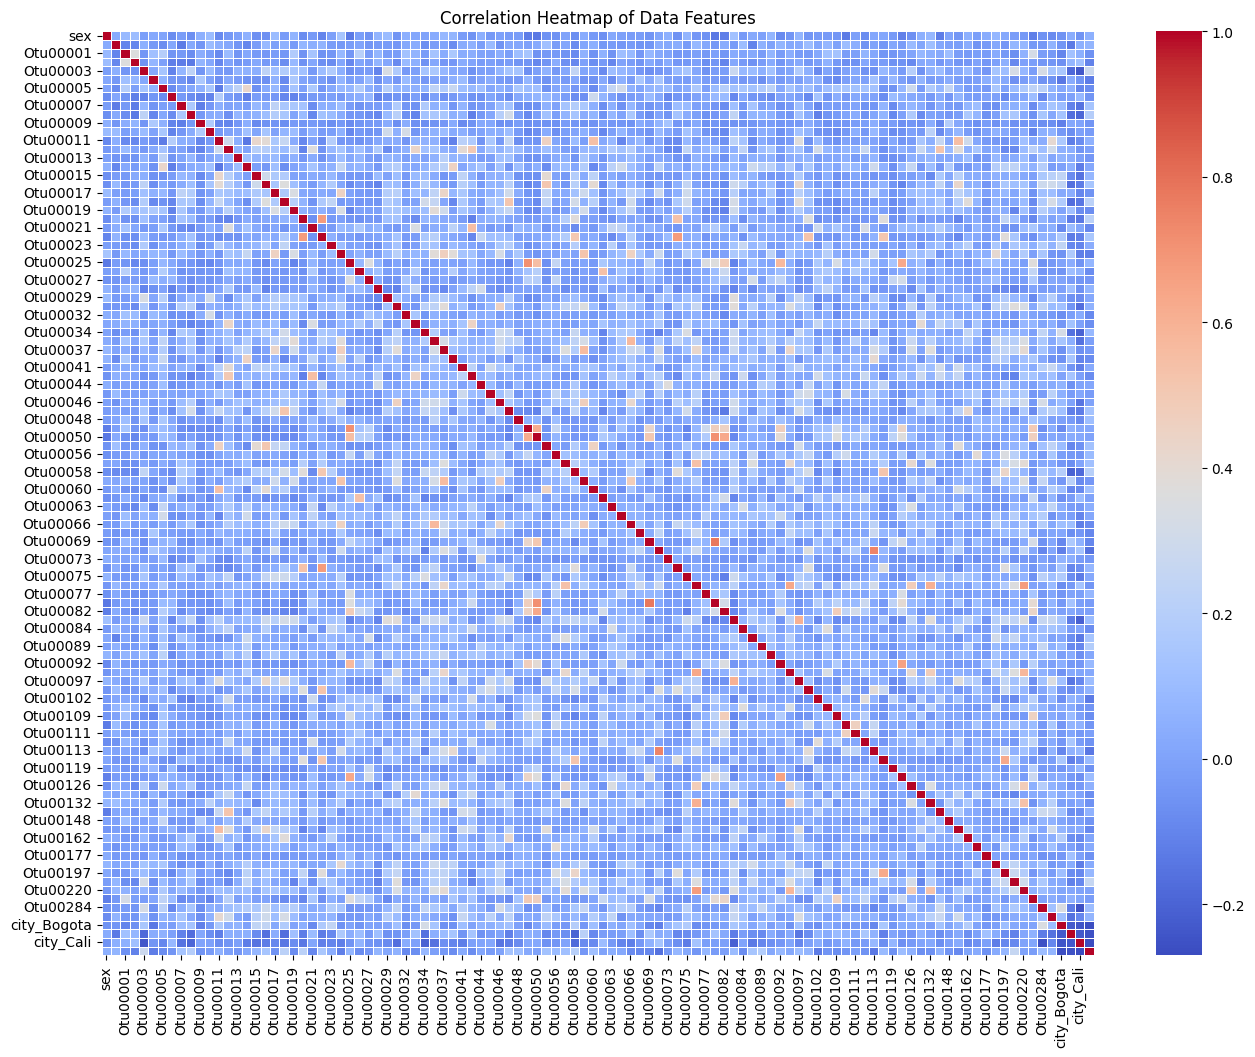

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(df_pandas_encoded.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Data Features')
plt.show()

In [ ]:
corr_matrix = df_pandas_encoded.corr()

# Unstack the correlation matrix to get pairs of features
corr_pairs = corr_matrix.unstack()

# Sort the correlations in descending order
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# Filter out self-correlations and duplicate pairs
# We'll keep only unique pairs where feature1 < feature2
unique_sorted_corr_pairs = sorted_corr_pairs.drop_duplicates()
unique_sorted_corr_pairs = unique_sorted_corr_pairs[unique_sorted_corr_pairs.index.map(lambda x: x[0] != x[1])]

# Convert to DataFrame for better display
correlation_table = unique_sorted_corr_pairs.reset_index()
correlation_table.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']

print("Correlation Coefficients (Sorted from Max to Min):")
print(correlation_table)

Correlation Coefficients (Sorted from Max to Min):
          Feature 1         Feature 2  Correlation Coefficient
0          Otu00069          Otu00080                 0.780608
1          Otu00071          Otu00113                 0.742398
2          Otu00050          Otu00080                 0.711918
3          Otu00025          Otu00049                 0.708777
4          Otu00074          Otu00022                 0.674192
...             ...               ...                      ...
5560      city_Cali       city_Bogota                -0.245702
5561  city_Medellin  city_Bucaramanga                -0.251341
5562      city_Cali          Otu00284                -0.253413
5563    city_Bogota     city_Medellin                -0.262899
5564  city_Medellin         city_Cali                -0.270538

[5565 rows x 3 columns]


In [ ]:
filtered_correlations = correlation_table[correlation_table['Correlation Coefficient'].abs() >= 0.75]
print("Correlations with absolute coefficient >= 0.75:")
print(filtered_correlations)

Correlations with absolute coefficient >= 0.75:
  Feature 1 Feature 2  Correlation Coefficient
0  Otu00069  Otu00080                 0.780608


## Distribución

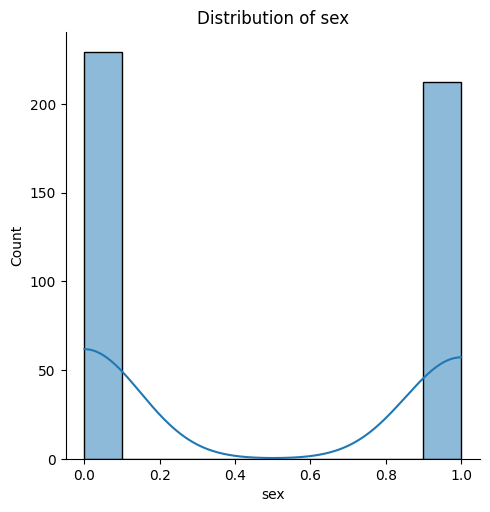

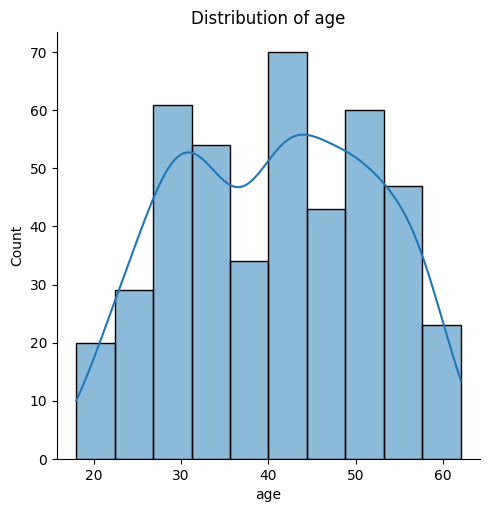

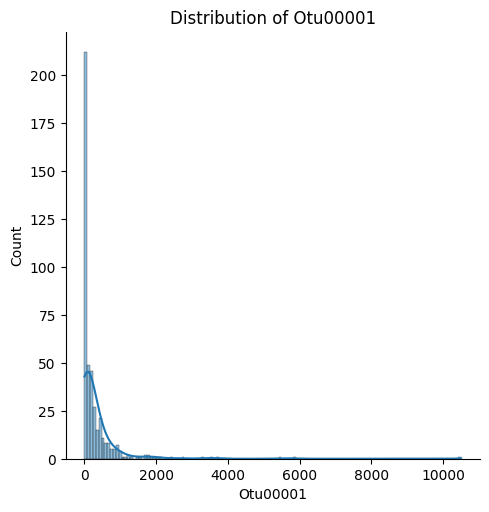

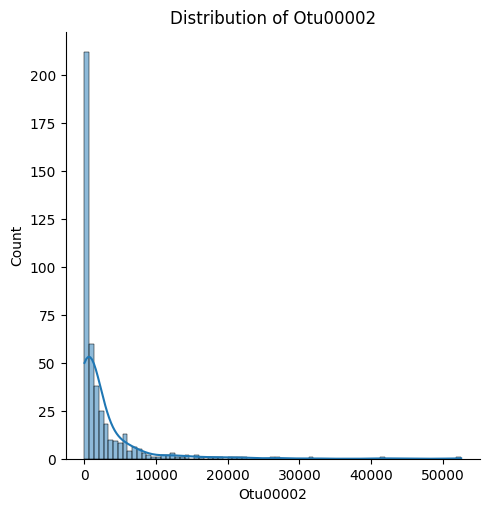

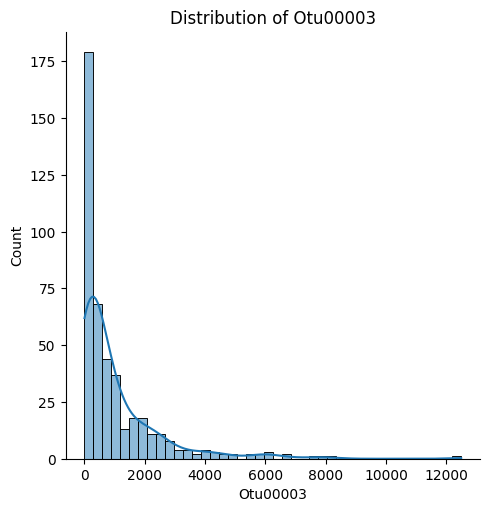

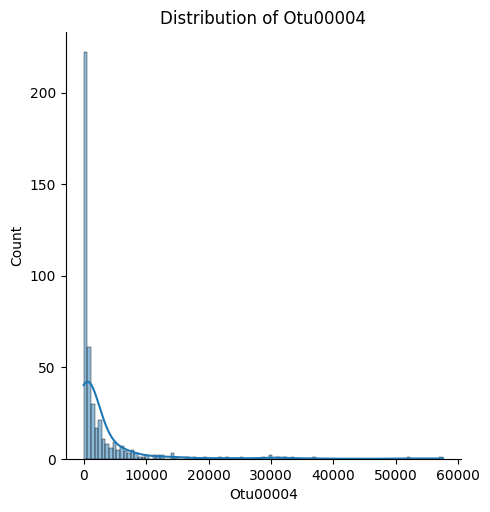

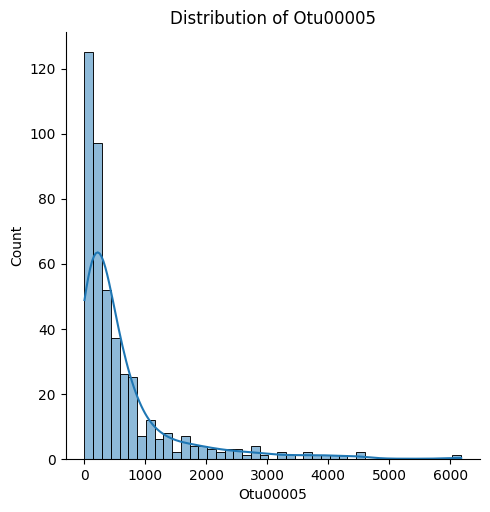

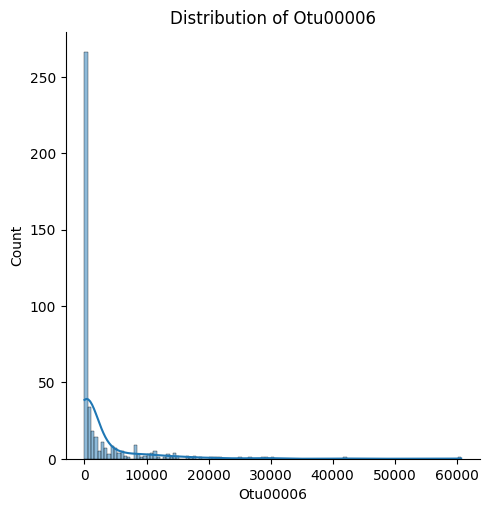

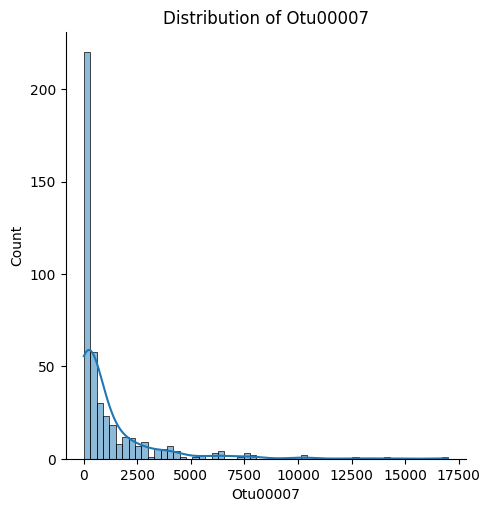

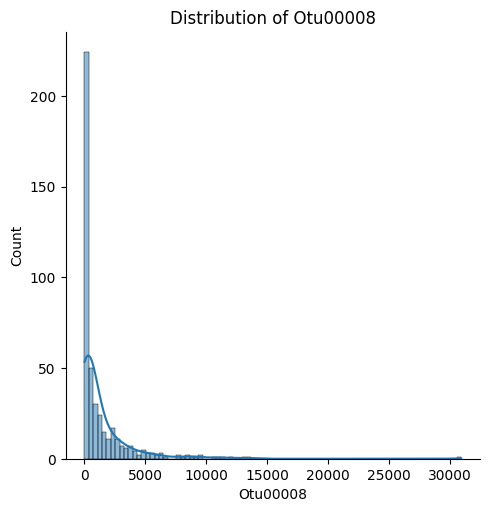

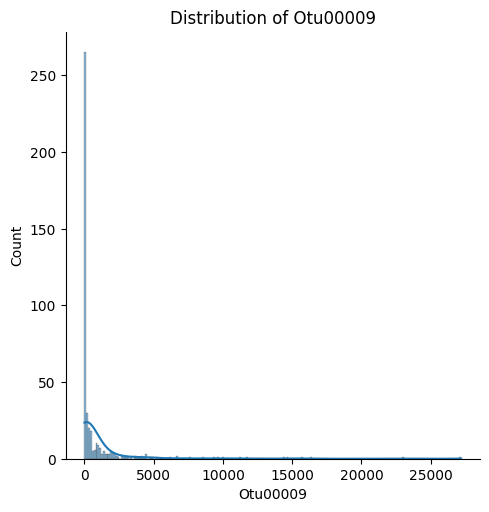

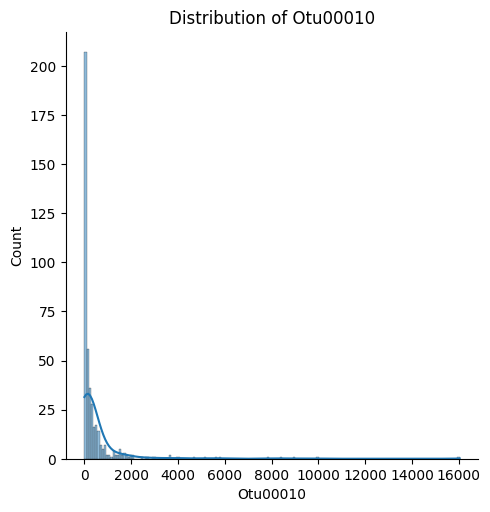

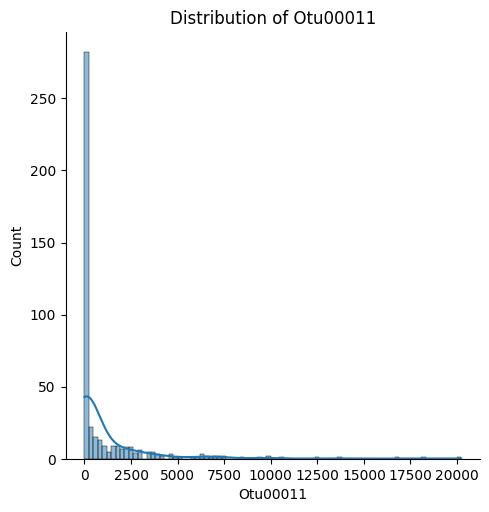

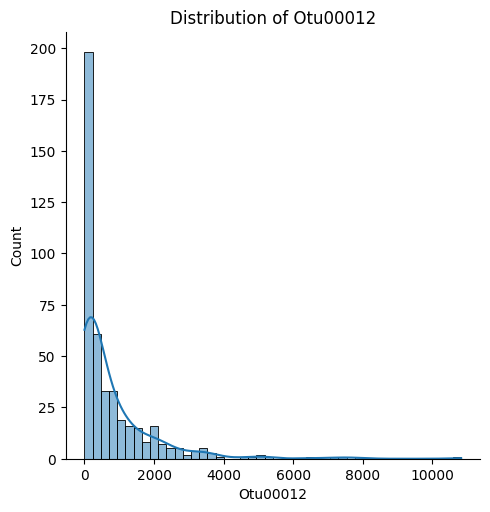

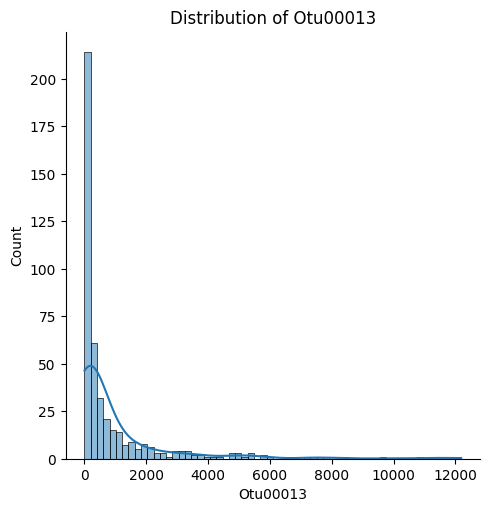

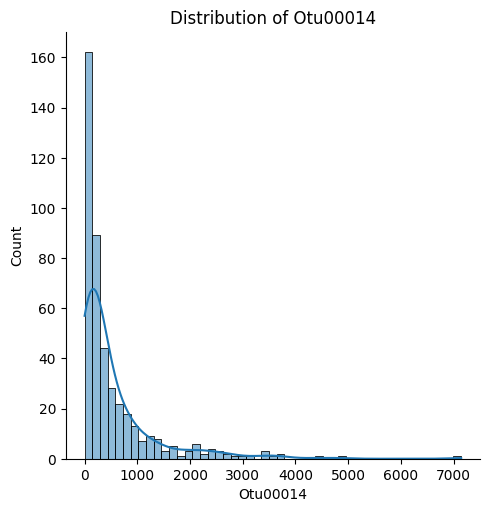

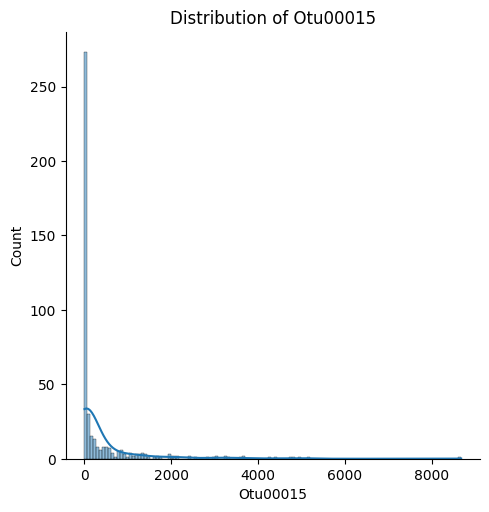

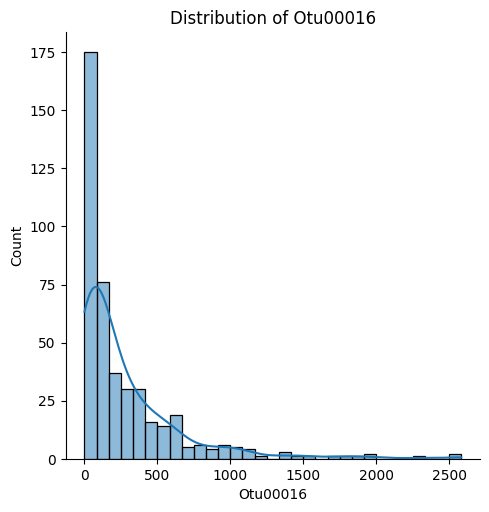

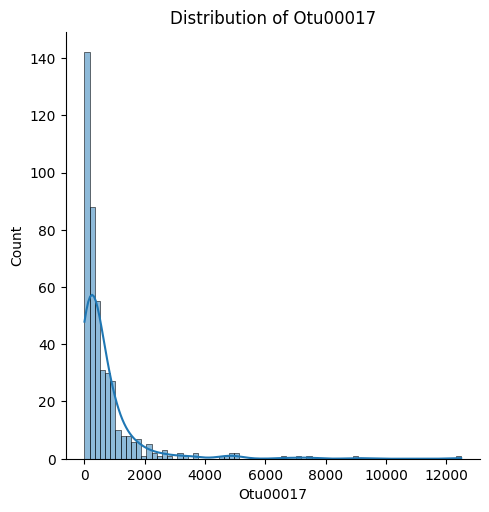

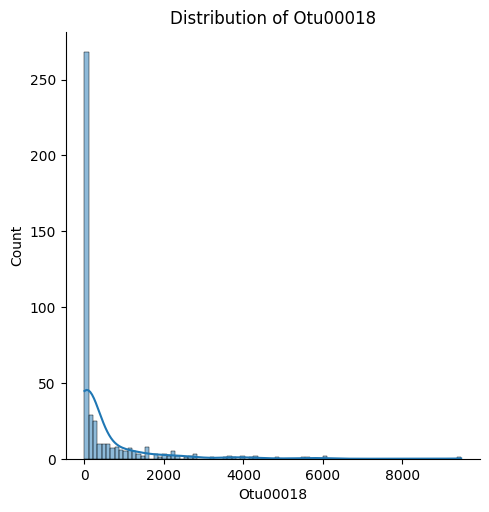

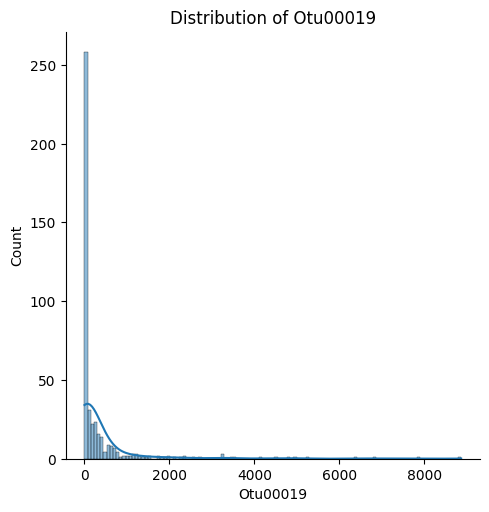

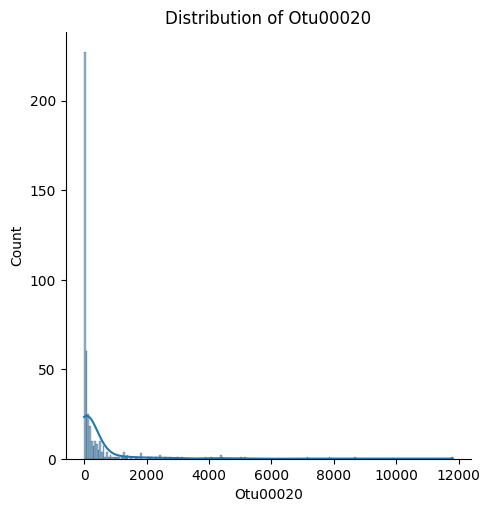

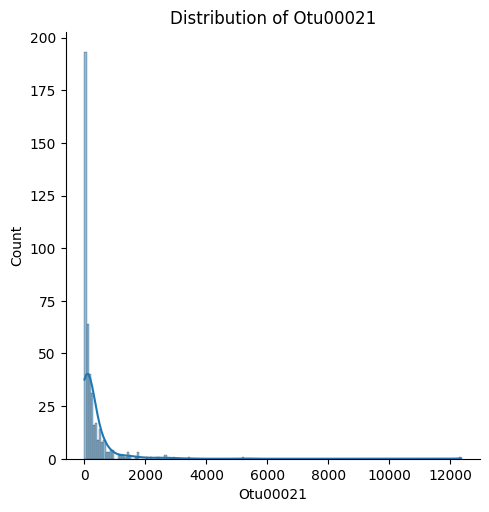

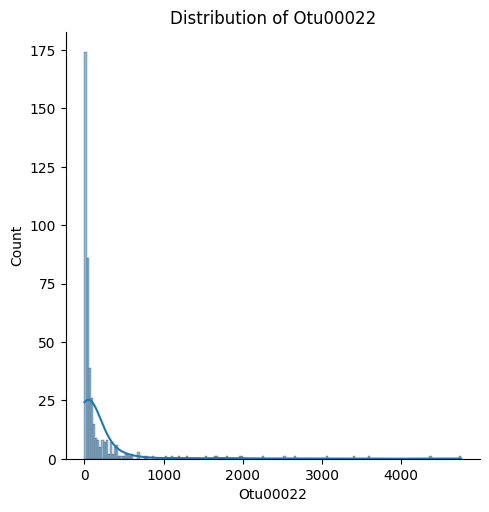

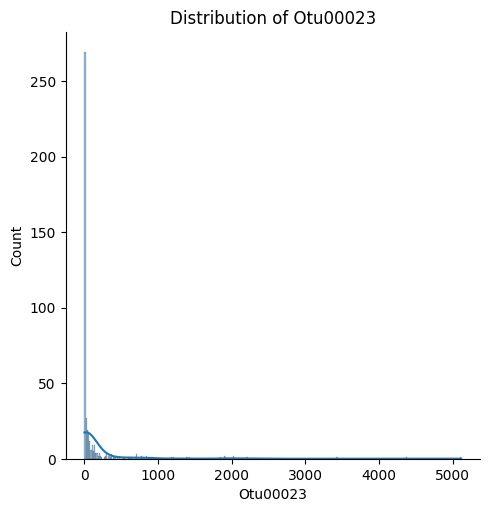

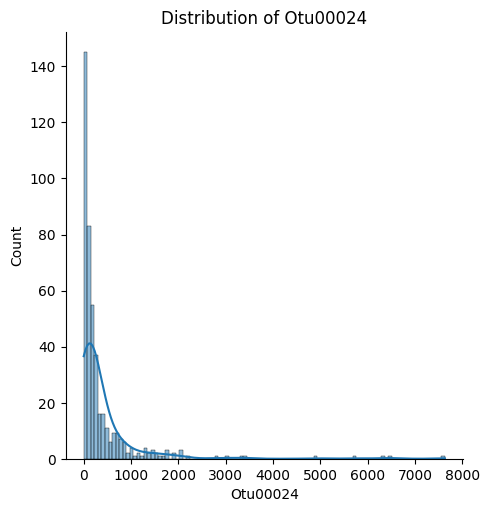

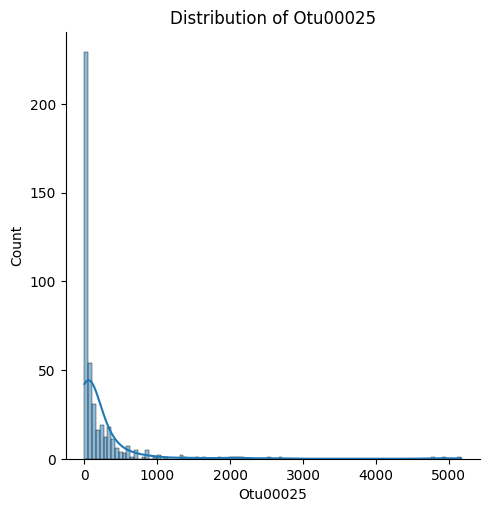

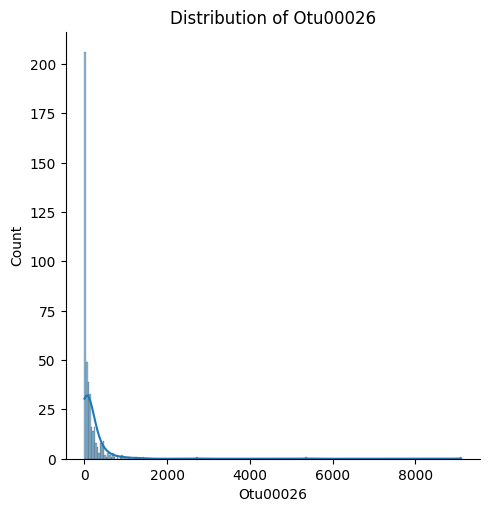

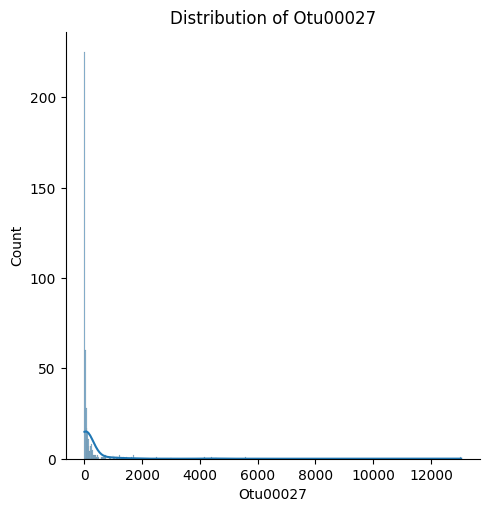

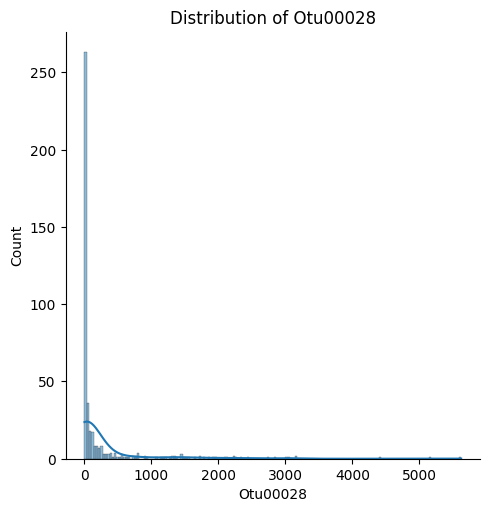

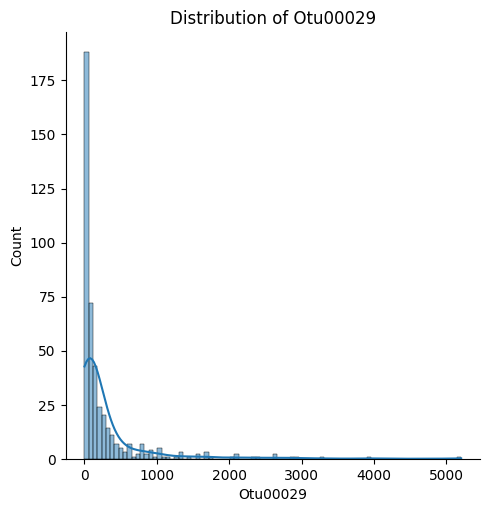

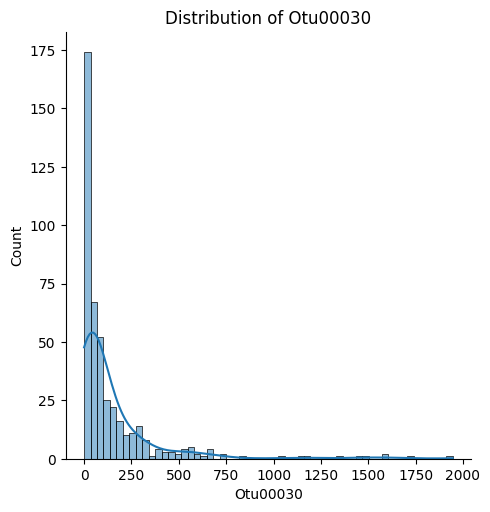

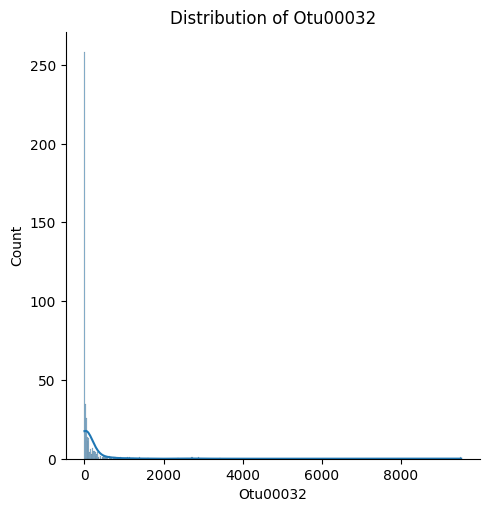

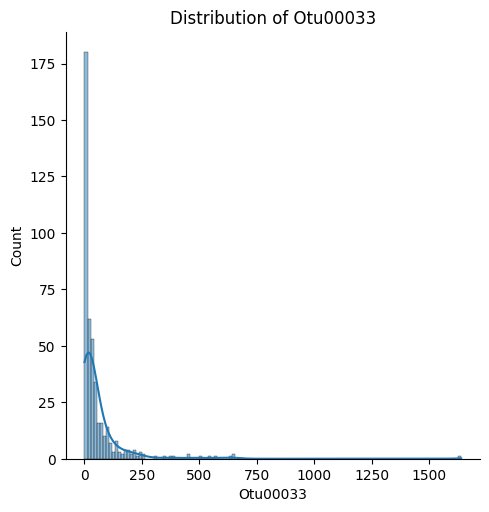

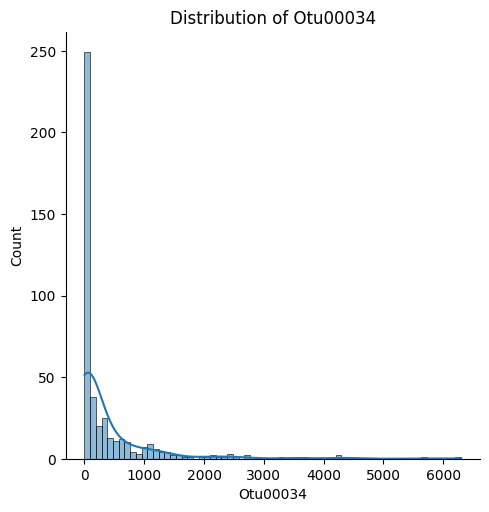

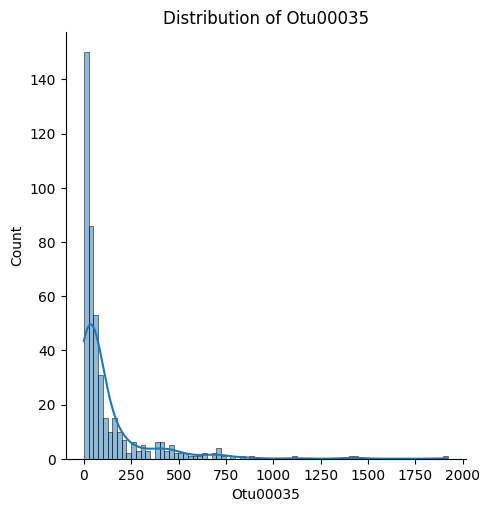

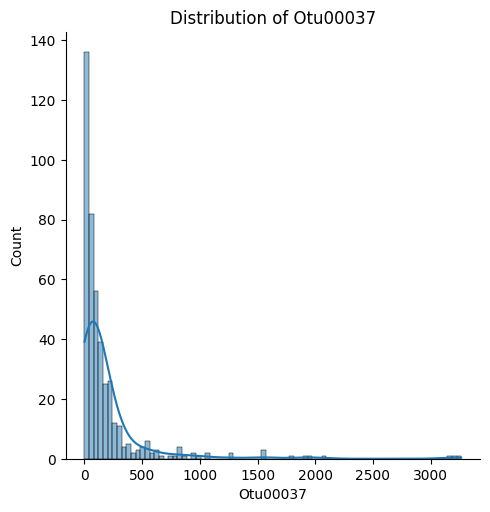

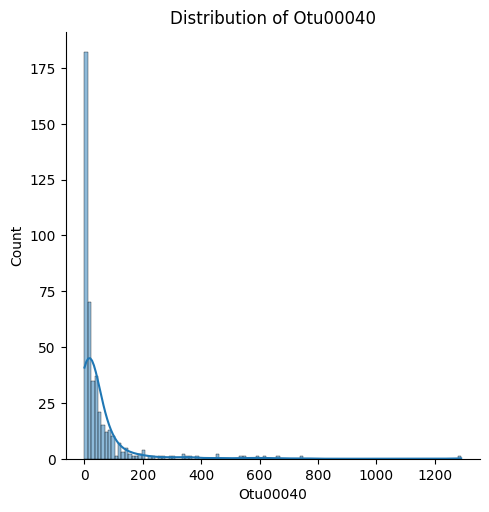

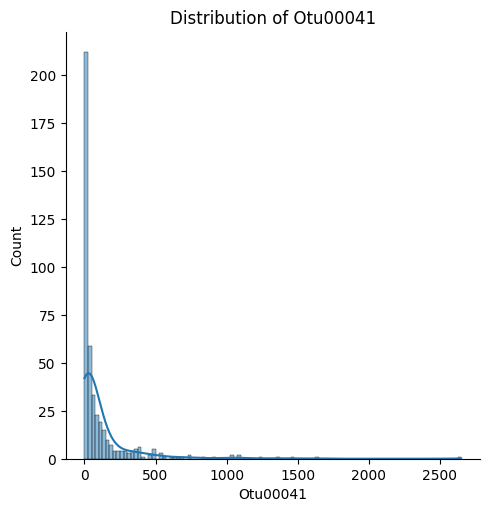

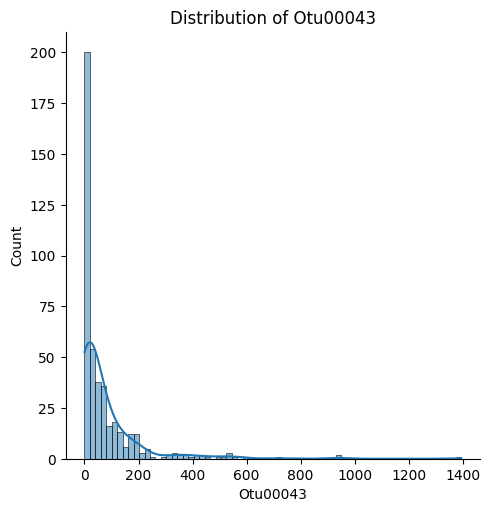

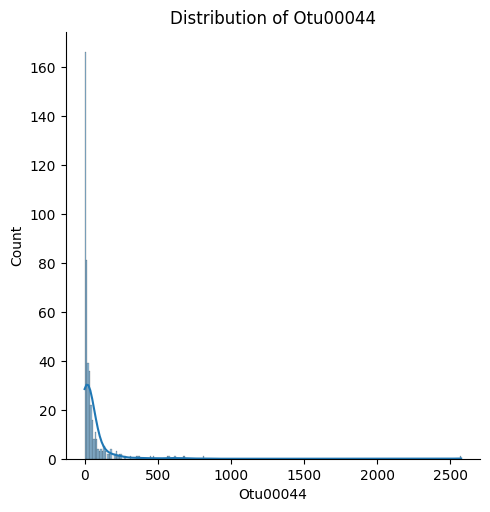

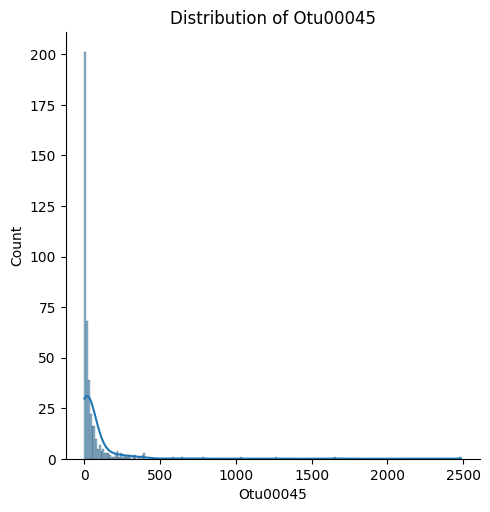

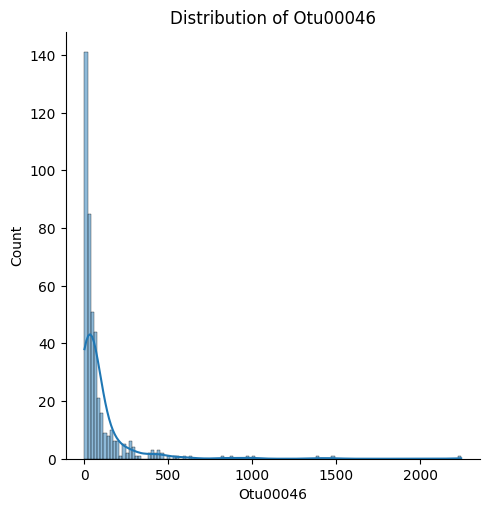

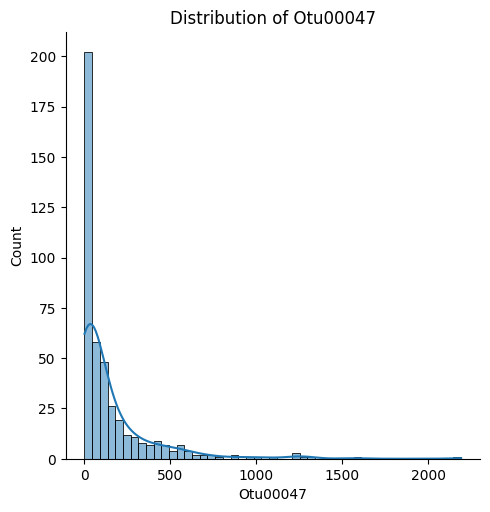

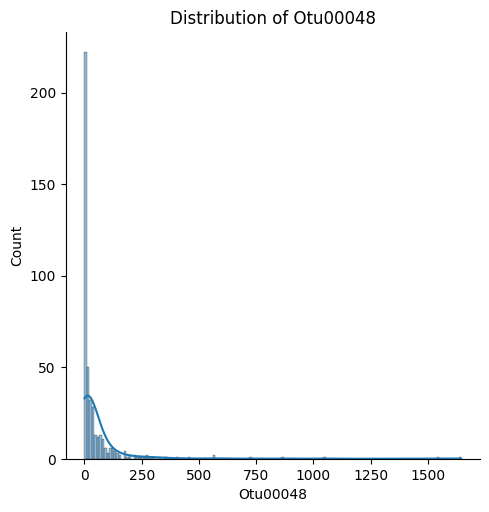

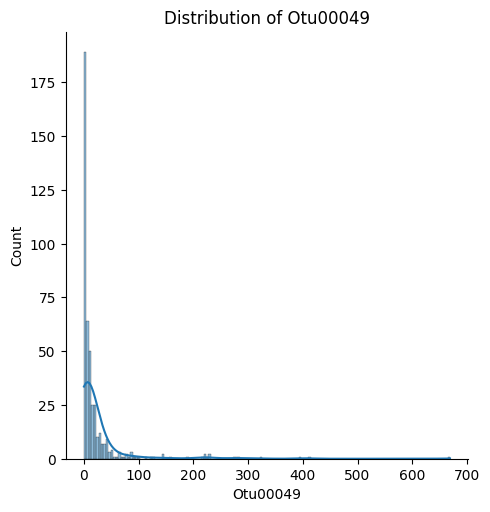

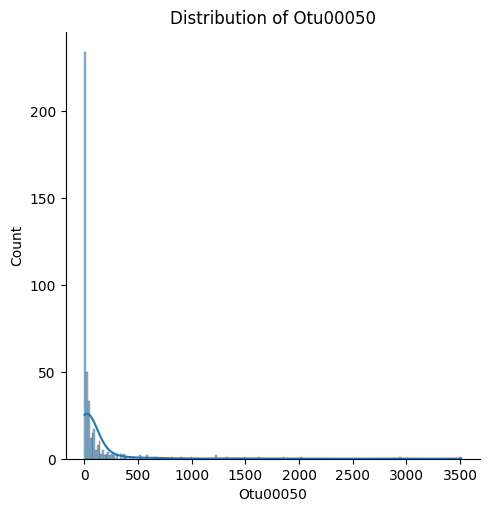

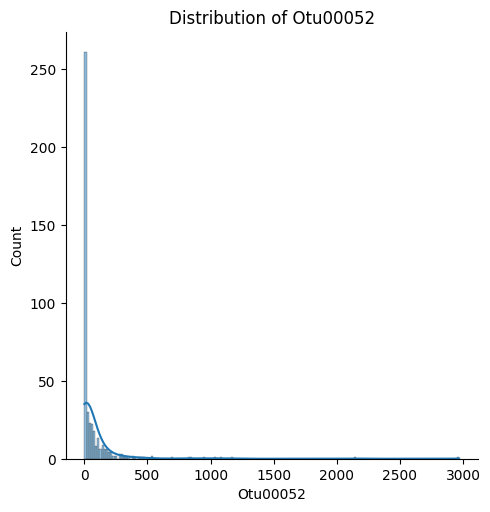

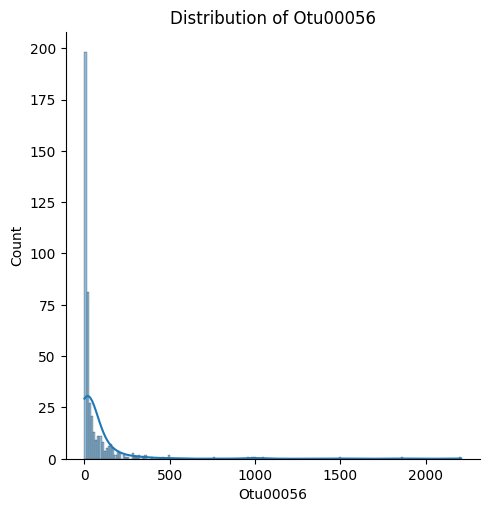

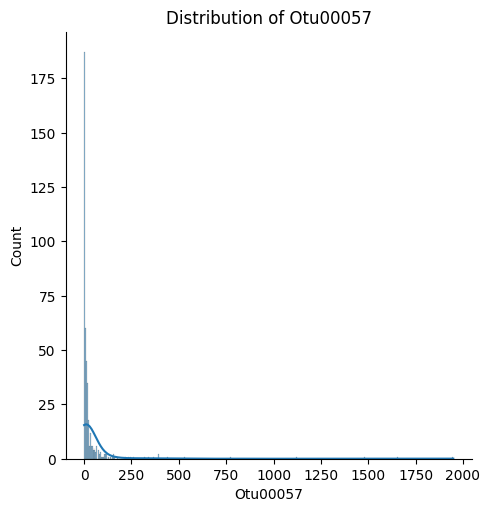

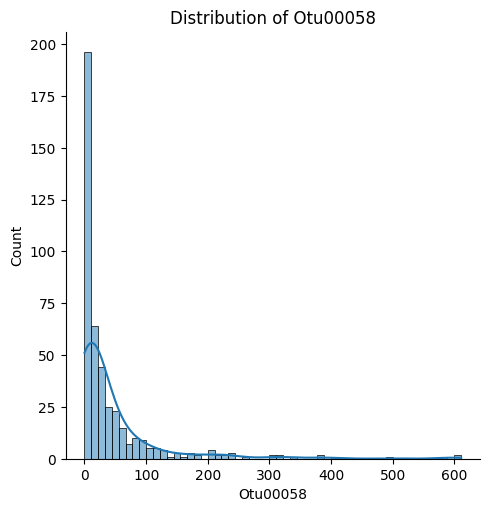

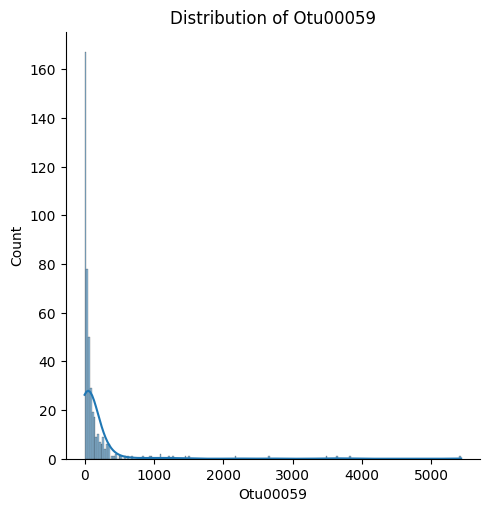

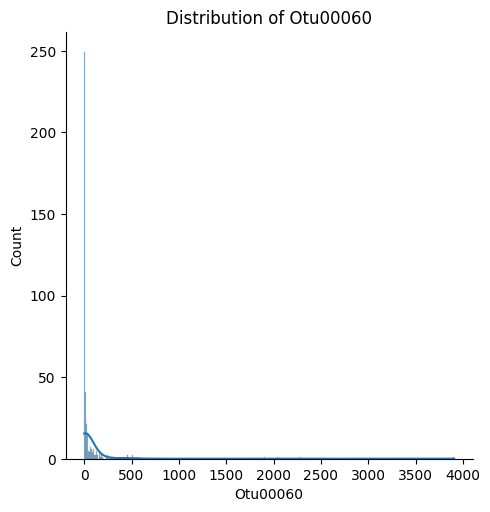

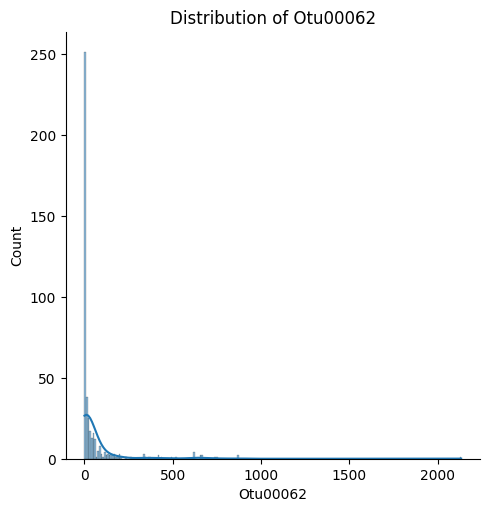

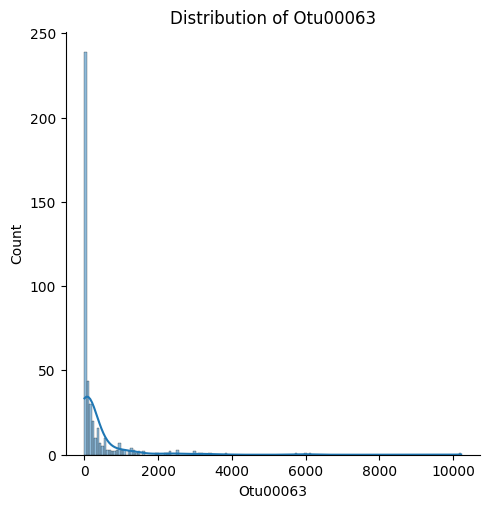

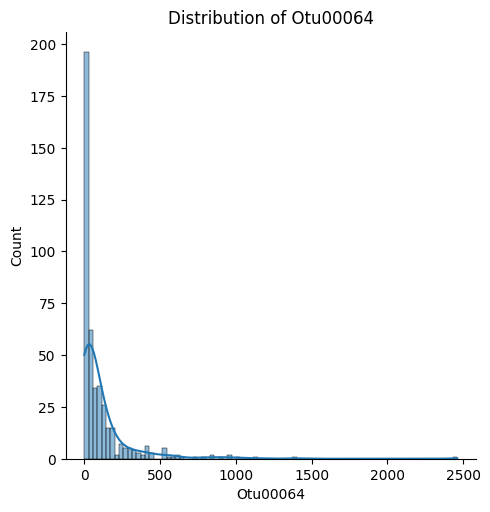

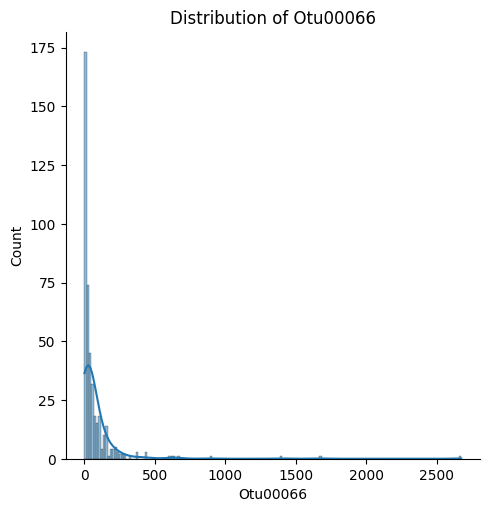

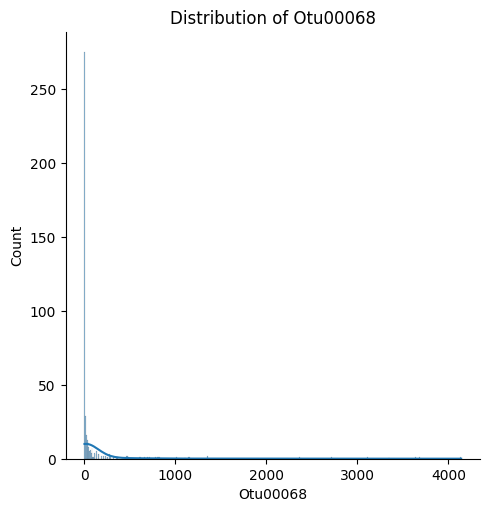

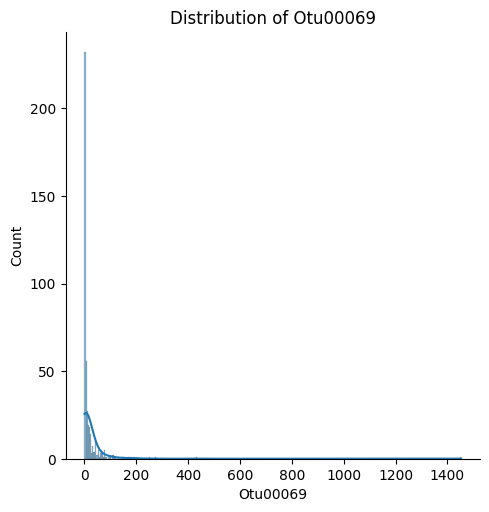

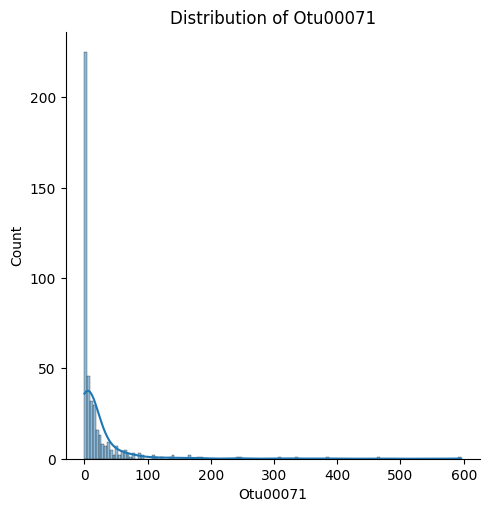

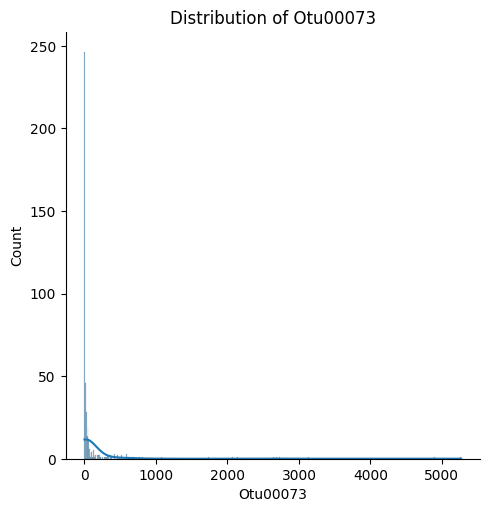

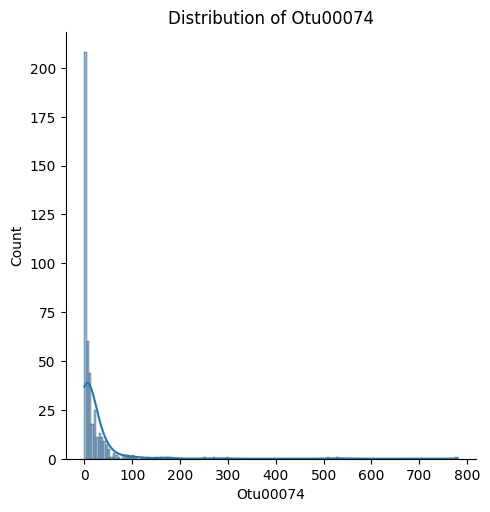

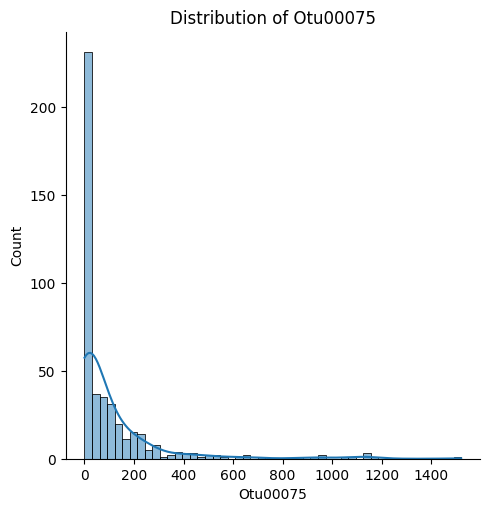

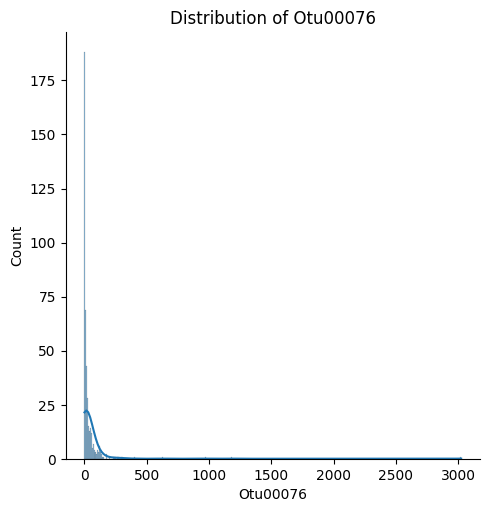

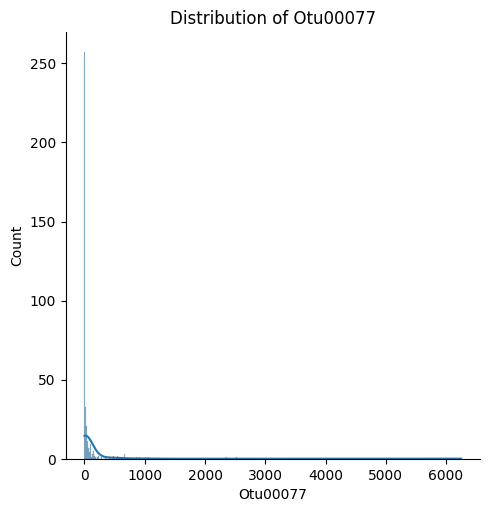

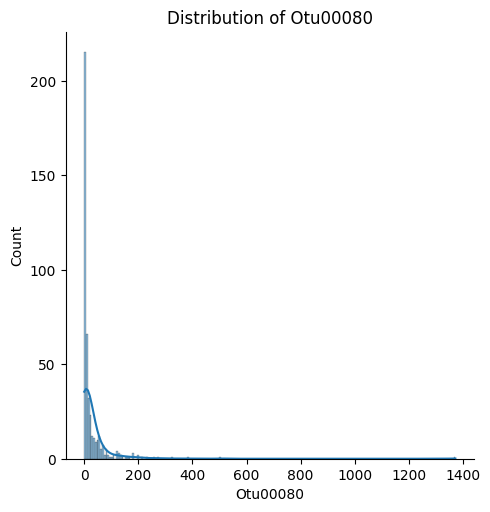

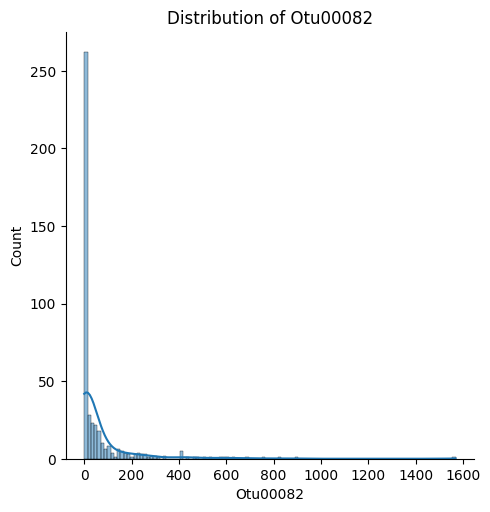

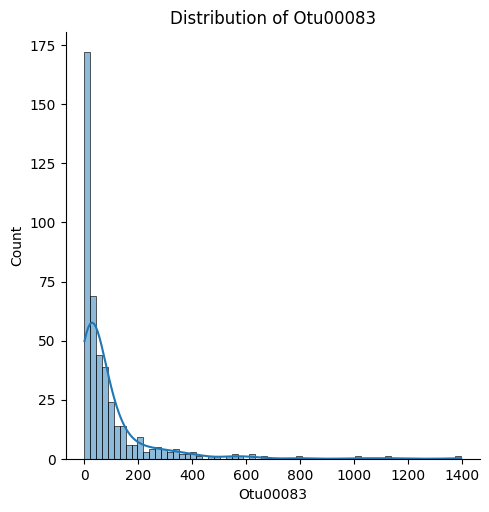

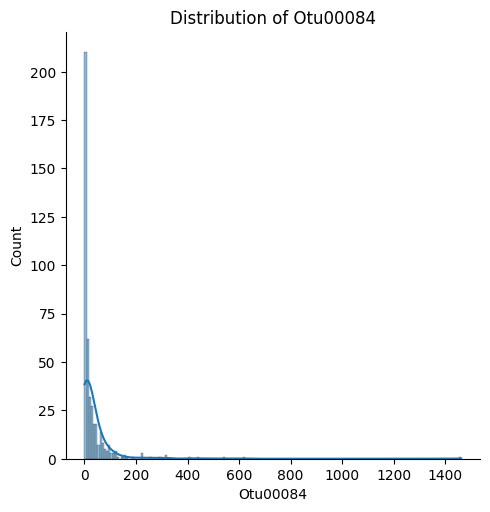

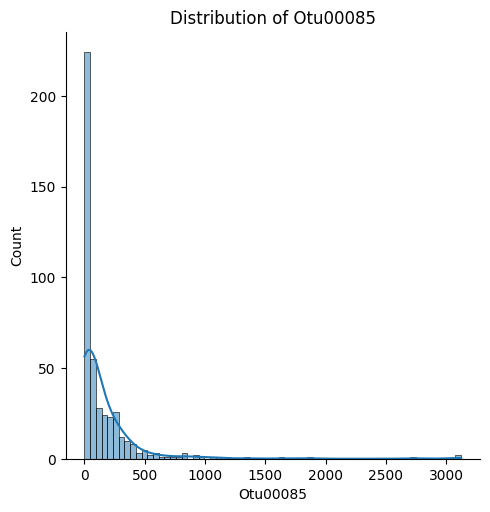

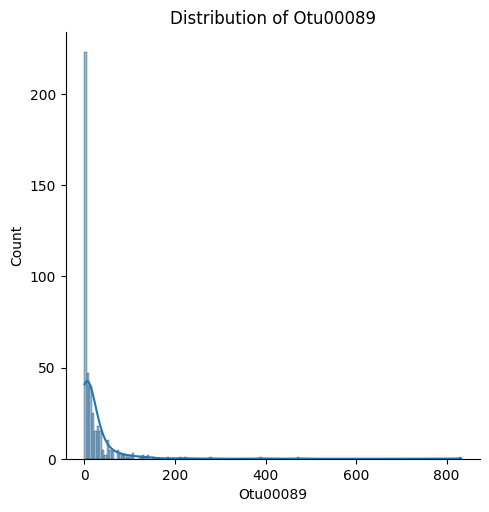

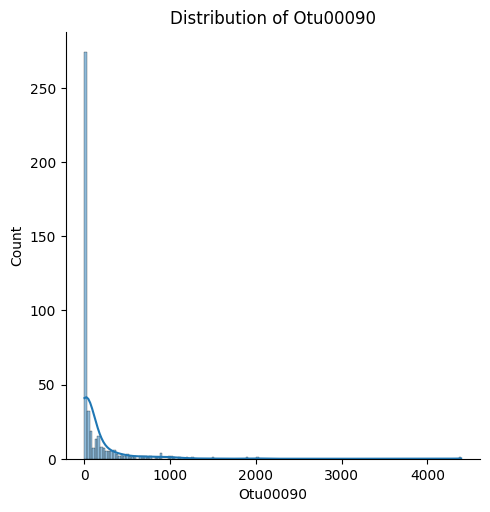

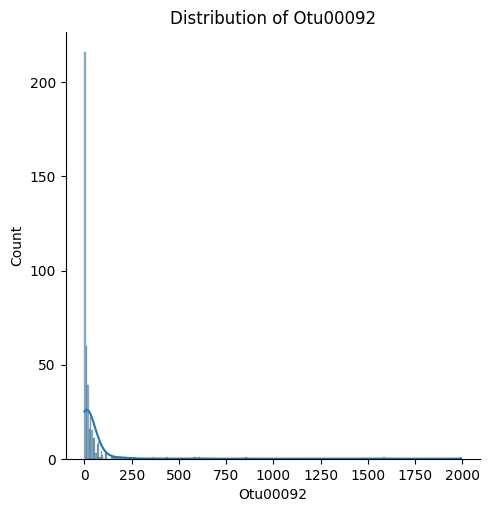

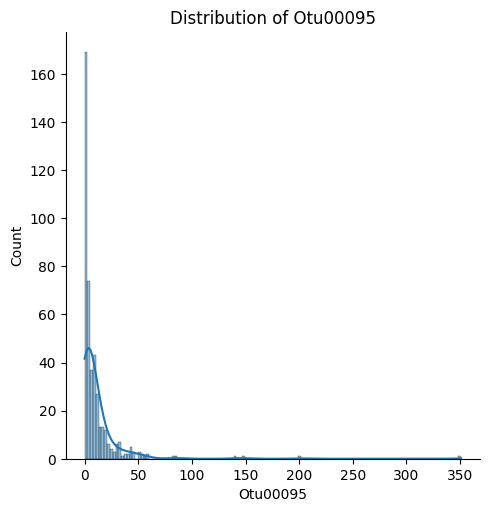

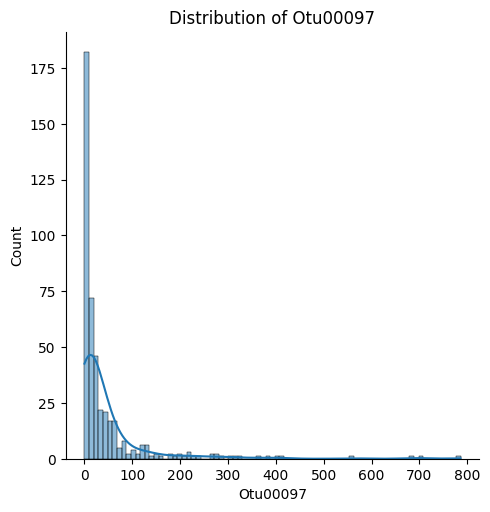

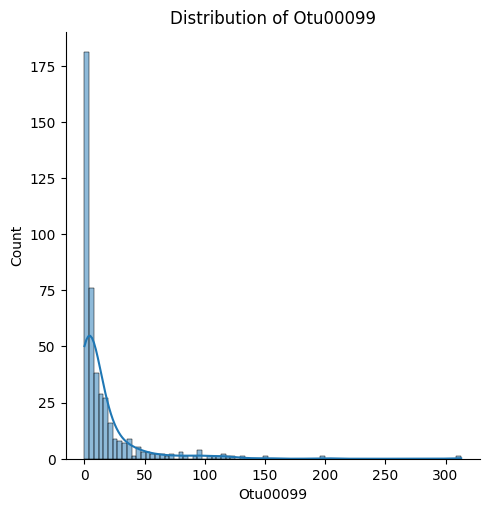

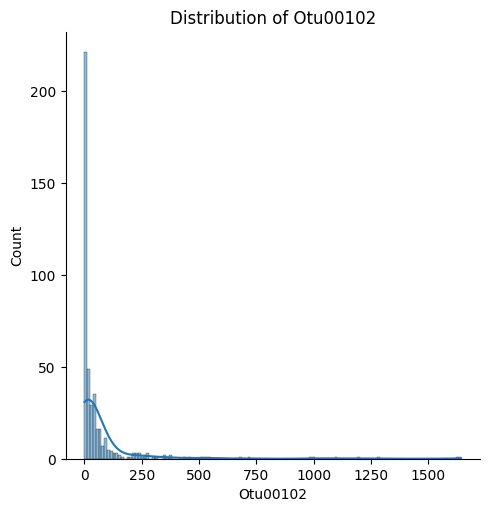

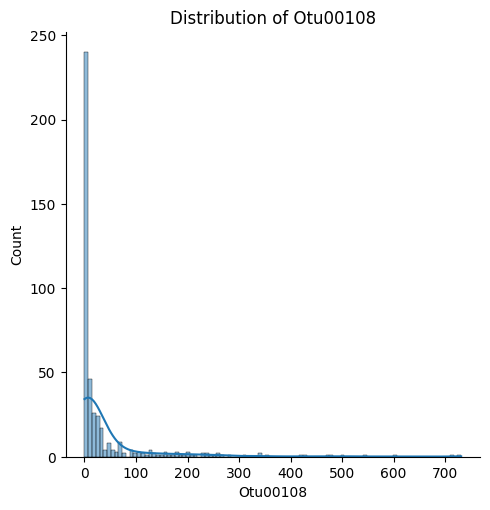

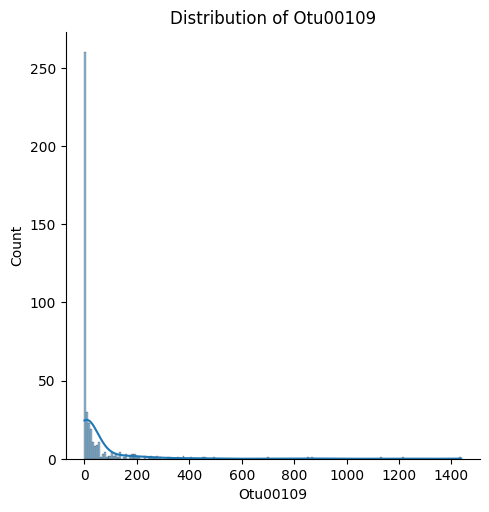

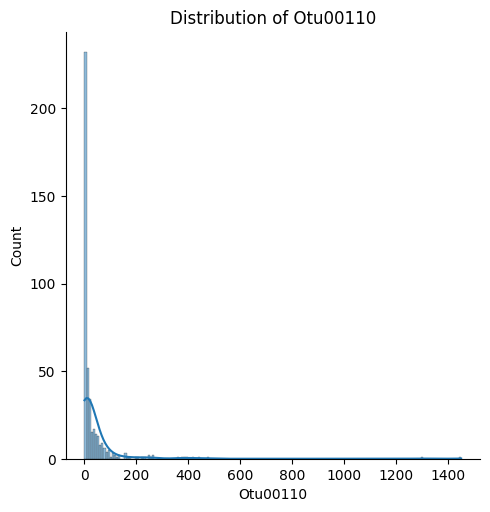

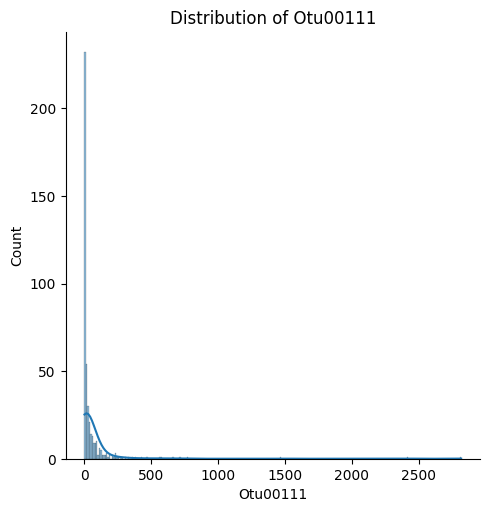

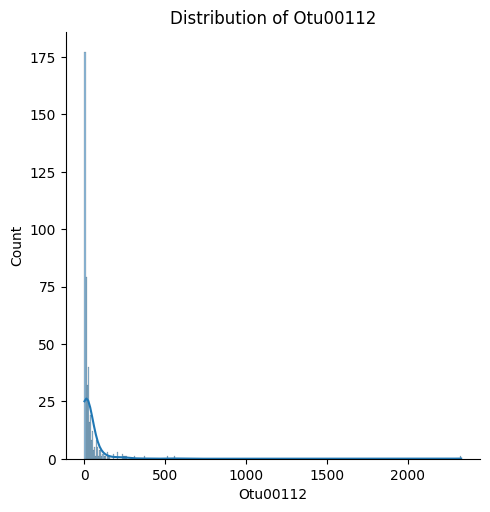

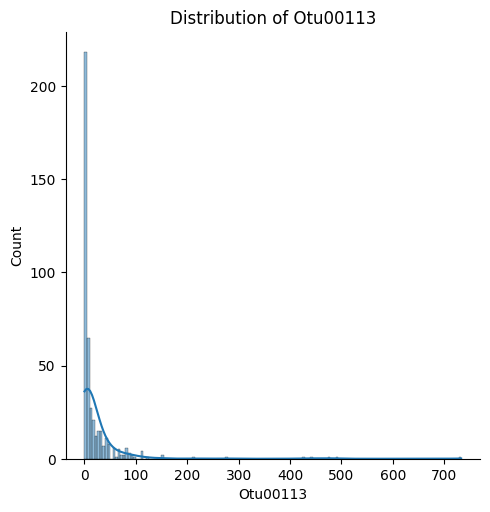

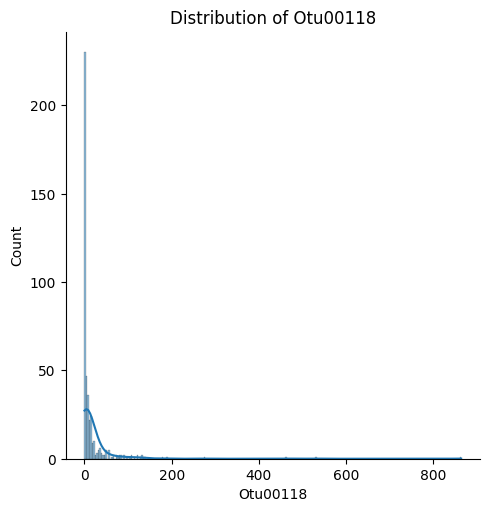

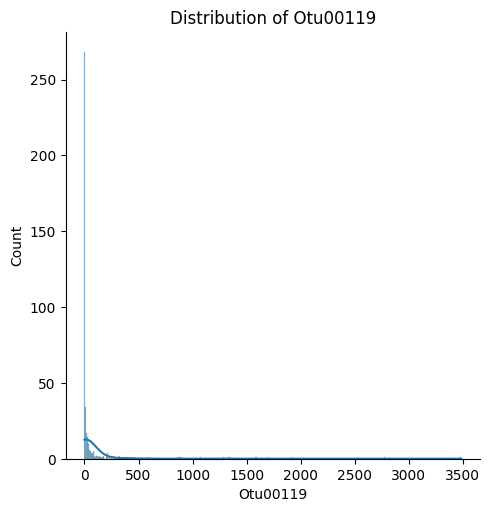

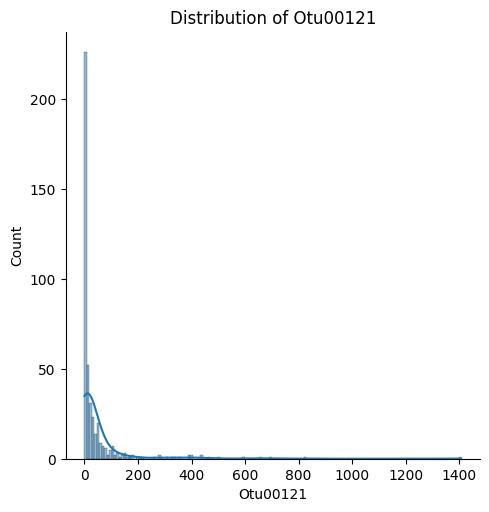

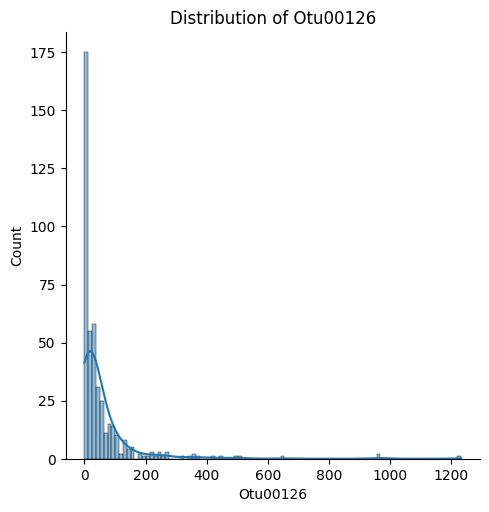

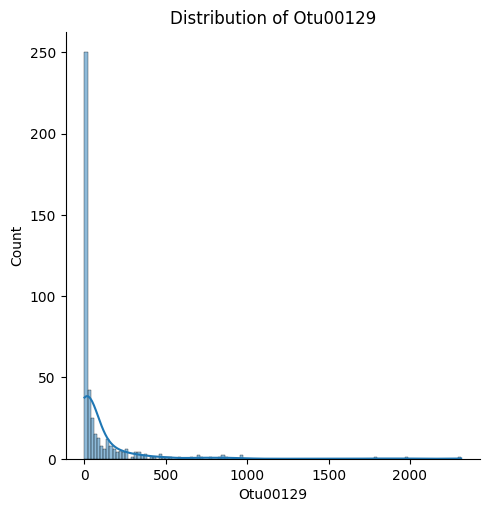

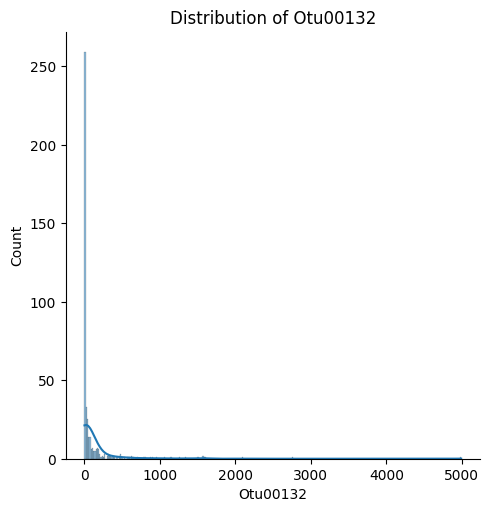

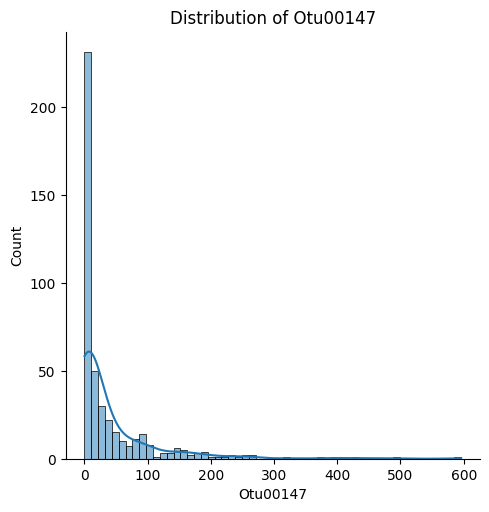

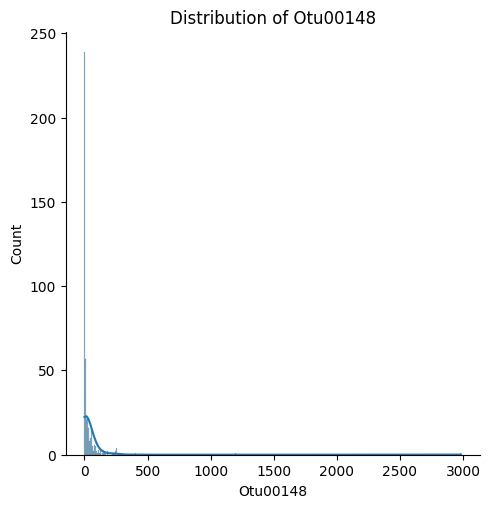

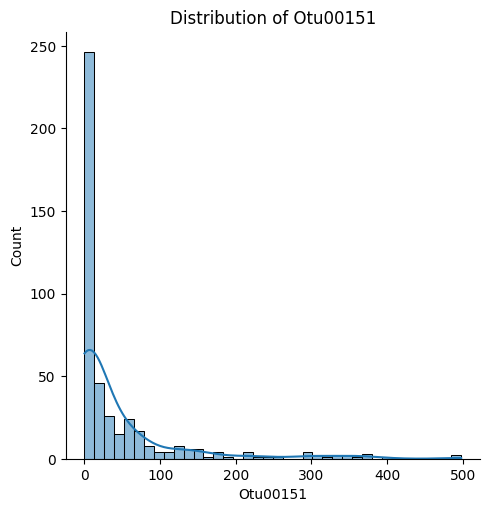

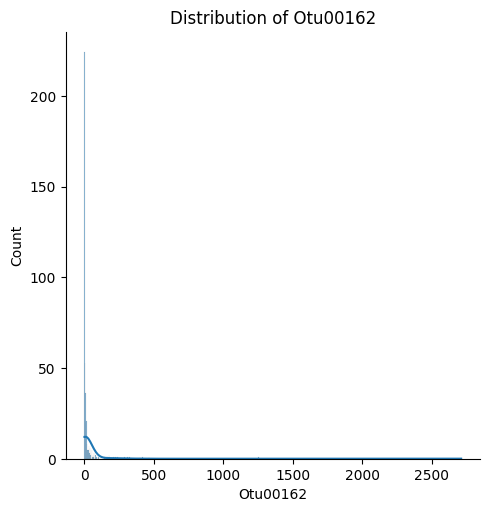

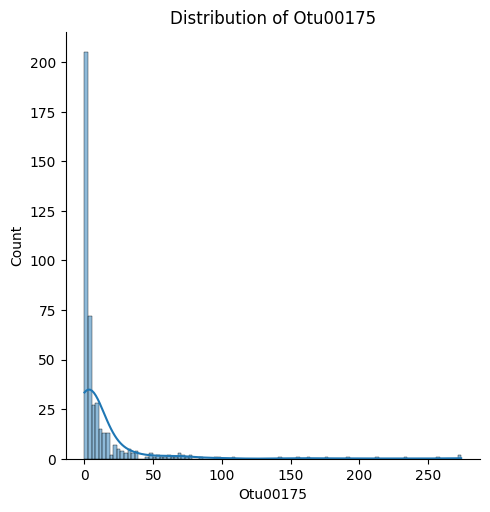

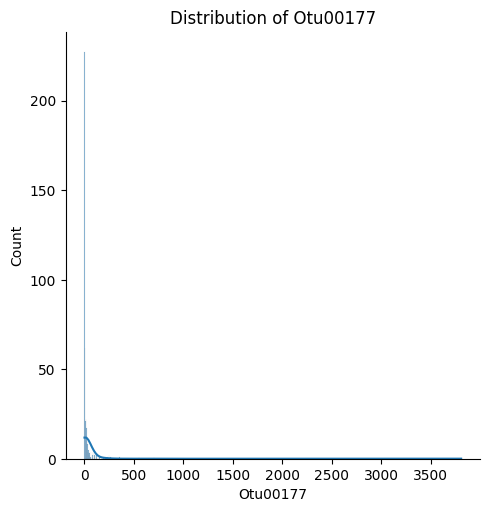

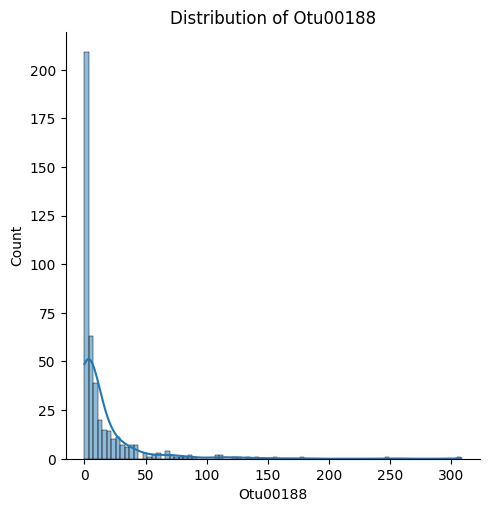

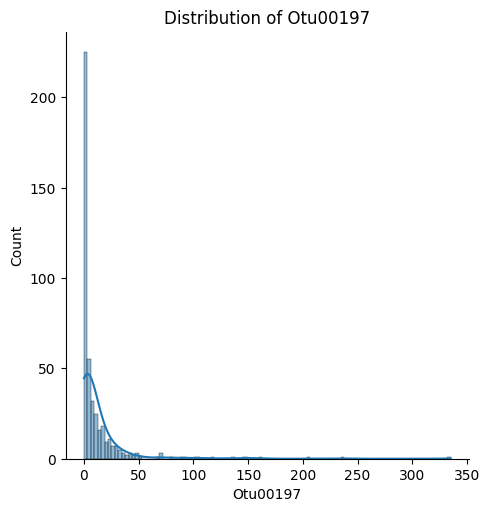

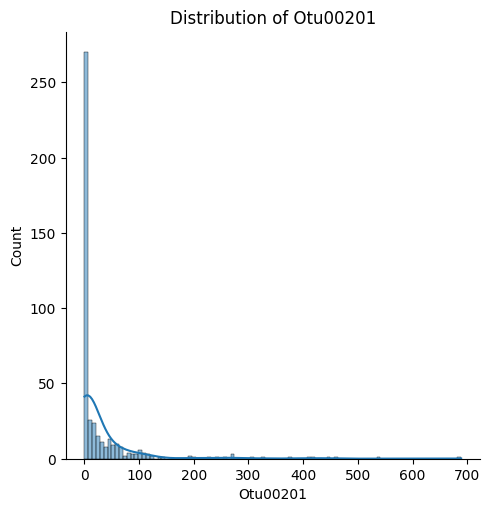

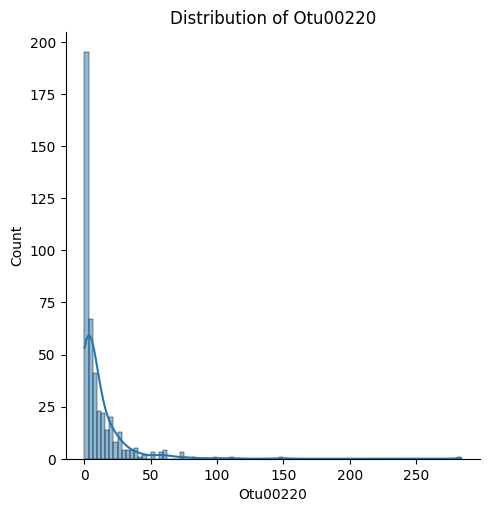

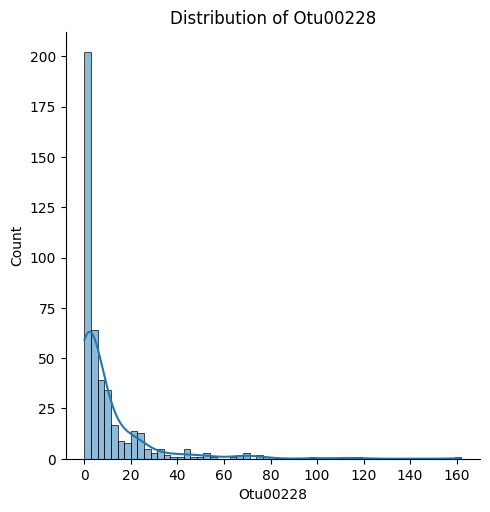

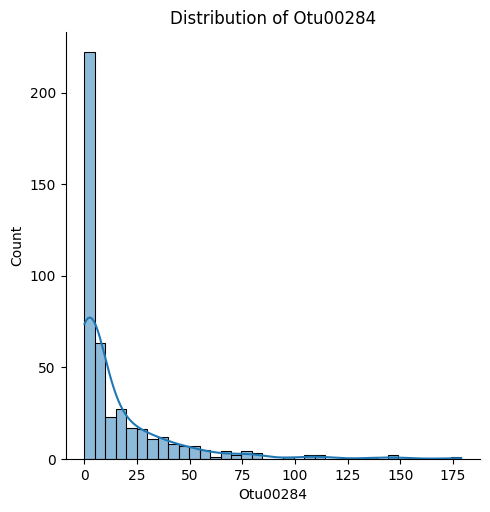

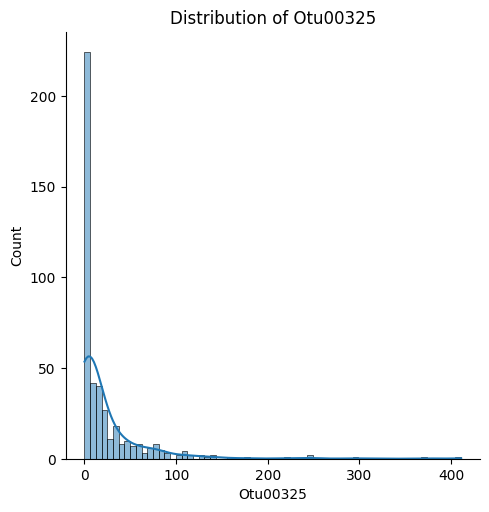

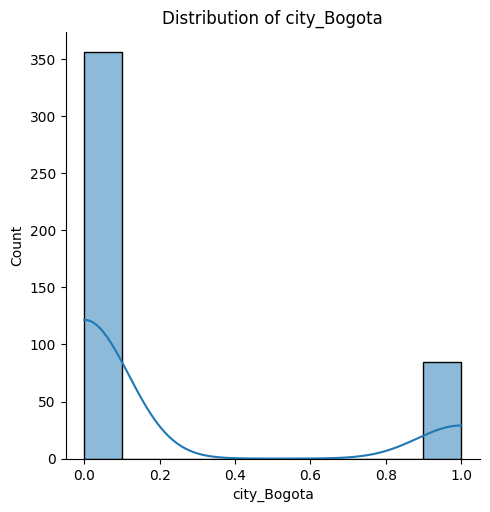

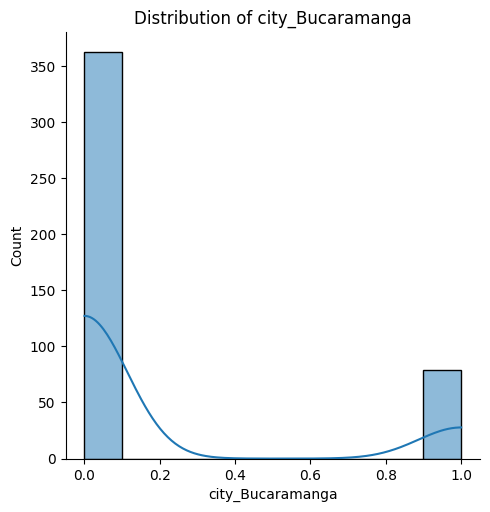

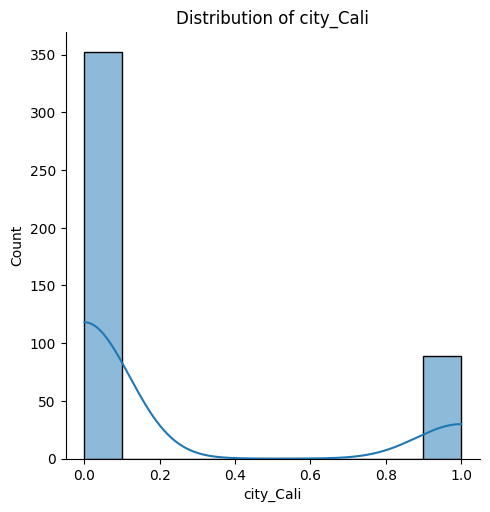

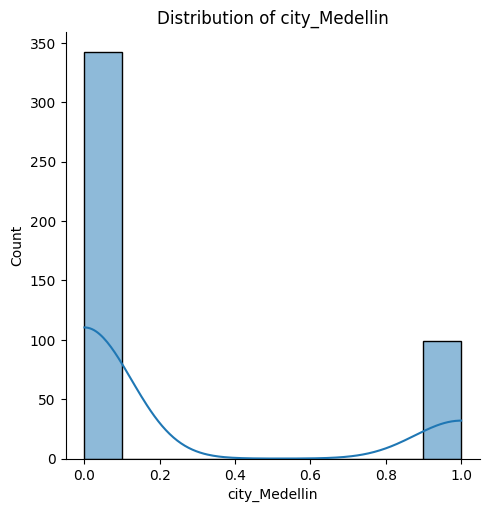

In [ ]:
for column in df_pandas_encoded.columns:
    sns.displot(df_pandas_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

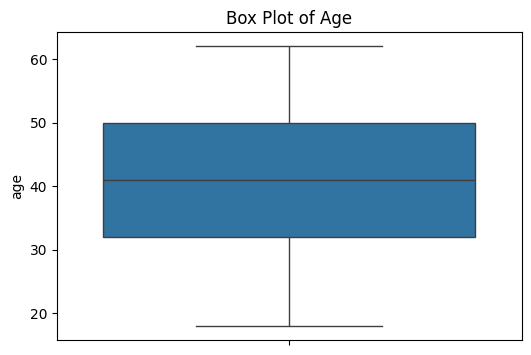

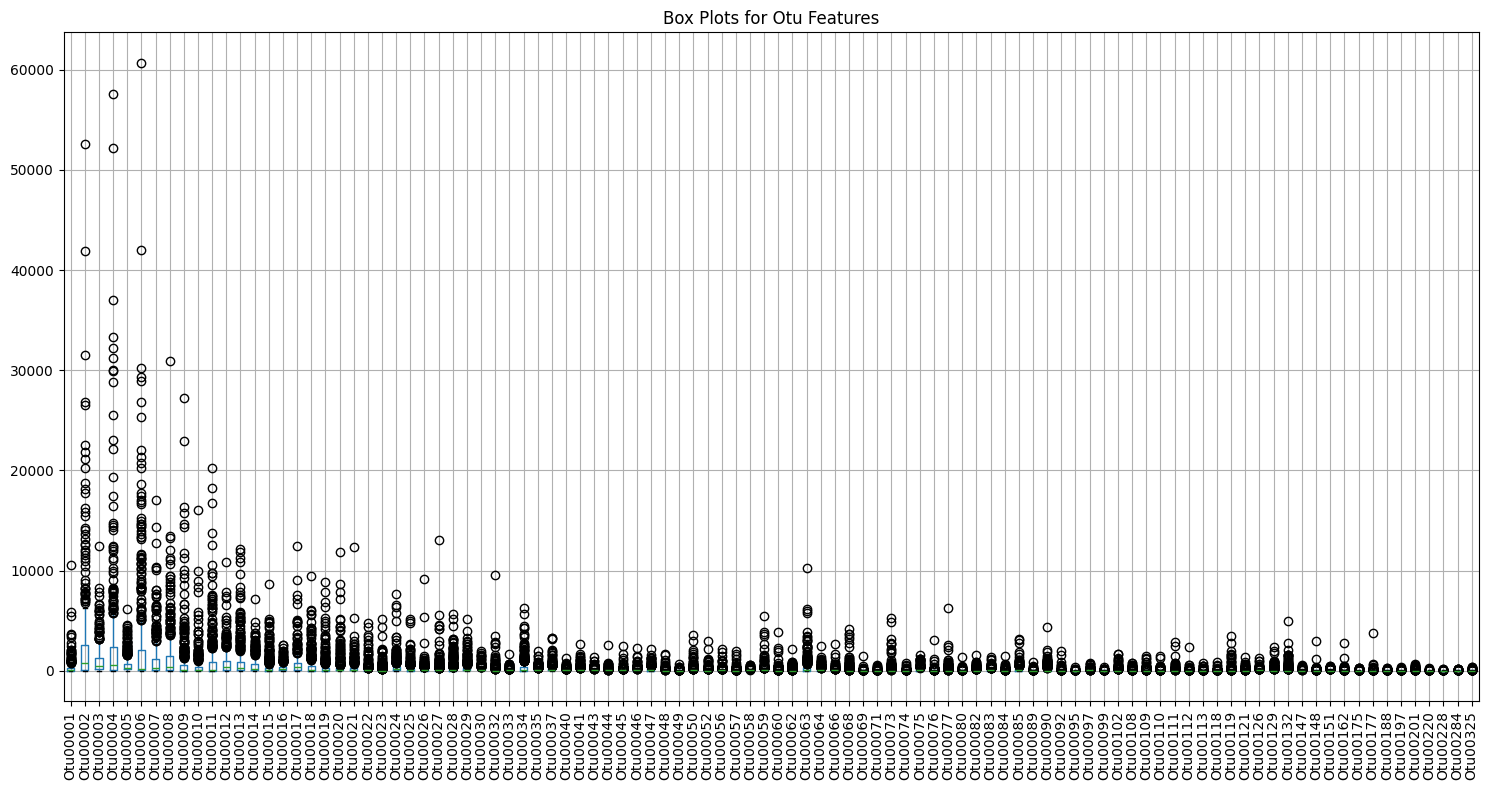

In [ ]:
# Grouping "Otu" features
otu_cols = [col for col in df_pandas_encoded.columns if col.startswith('Otu')]

def boxplot(df):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df['age'])
    plt.title('Box Plot of Age')
    plt.show()
    plt.figure(figsize=(15, 8))
    df[otu_cols].boxplot()
    plt.title('Box Plots for Otu Features')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

boxplot(df_pandas_encoded)

In [ ]:
outliers_df = pd.DataFrame(data={"OTU": otu_cols}, index=pd.RangeIndex(start=1, stop=len(otu_cols)+1))

def get_outliers(name, df):
    count_column = name + "_" + "count"
    percentage_column = name + "_" + "%"
    for col in otu_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_df.loc[outliers_df["OTU"] == col, count_column] = len(outliers)
        outliers_df.loc[outliers_df["OTU"] == col, percentage_column] = len(outliers) / df.shape[0]

get_outliers("original", df_pandas_encoded)
outliers_df

,OTU,original_count,original_%
1,Otu00001,40.0,0.090703
2,Otu00002,44.0,0.099773
3,Otu00003,34.0,0.077098
4,Otu00004,53.0,0.120181
5,Otu00005,46.0,0.104308
...,...,...,...
96,Otu00201,51.0,0.115646
97,Otu00220,34.0,0.077098
98,Otu00228,37.0,0.083900
99,Otu00284,37.0,0.083900
